<a href="https://colab.research.google.com/github/ksuaray/Suaray25/blob/main/4_4_Your_Second_Scikit_Learn_Classification_Model__Predict_Dropout_at_3rd_Semester_using_L1_L2_Penalty_(Elastic_Net).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Welcome to the final Module of this course. You've made tremendous progress so far, evolving from using data to simply describe students and campuses, to now using data to make predictions and concrete decisions. The thing is, we've just scratched the surface on

- the multitude of directions we could go in interrogating our data to mine rich insights, and

- the many machine learning models we could use to improve results.

In this module, we'll see some ways our previous findings can deepen the questions we ask of our data, and learn two widely used enhancements to our previously applied models that will serve as the perfect segue into more advanced ML modeling.

###Higher Education Challenge: Enhanced Models for Deeper Questions

Higher Education is full of highly skilled professionals who are driven to create environments and provide resourses to see all students succeed. Shontelle and Antonio exemplify this sentiment, and are excited about the role their new found experience with descriptive and predictive modeling can bring to their advising and policy making. They catch up over coffee to hear about the impact their statistical and machine learning models are having on their service of students.

In their meeting of the minds, two pressing considerations arise. Antonio remembers a report from the Educational Opportunity Program that indicated that first generation students were not being retained at the university at the same rate as continuing generation students. Even more troubling was that it seemed the effects differed based on Race/Ethnicity. After learning about Shontelle's model, he wondered if it could be used to make predictoins to investigate this unsettling trend.

Shontelle also had a suggestion for Antonio. She was impressed with how GPA predictions could be generated before the semester even began. But she also noted that if a student never steps foot on campus in that semester due to not being retained, the GPA prediction is useless. She wonders if they can use the skills learned in the certificate program to somehow use both models together.

Data exploration leads to insight. But that insight leads to further interrogation, enhancing the quality of the investigation. And just as their questions are becoming more rich and nuanced, Shontelle and Antonio would like to learn more machine learning models to address these tasks.

In this module we continue to cover Supervised Machine Learning. For continuous labels, we've employed Multiple Linear Regression (MLR), our Baseline Statistical Model, and for qualitative labels we utilized Logistic Regression. We saw that these models did a good job of generalizing what we learned from the training set to the test set. The question at hand: "Is it possible to make a good thing better?". By strategically modifying our objective function, the solutions to the MLR and logistic models evolve from the previously seen outcomes to one of three possibilities: LASSO, Rigde Regression, or Elastic Net - based on how the modification is made. In this notebook, we'll see how just four Python libraries - **Pandas**, **NumPy**, **Plotly** and **Scikit Learn** - are all you need to implement the entire Machine Learning cycle with these new methods for Higher Ed data.



#2.3. Get Your Data Machine Learning Ready for Classification: Data Wrangling

##Preparing the Data

###Data Import

In Course 1, Module 3: *Magic Pandas Library: Mastering Higher Education Data Preparation and Analysis*, we learned how to merge data that originated from multiple sources accross campus. The High School, Enrollment, Admissions, Course and Completion datasets all provide valuable information to assist us in our effort to predict student metrics in future semesters. As you recall, we've selected a subset of the variables from these data to include in the modeling phase. These include:
1. Academic Performance Data

      - Available at time of admission: high school GPAs

      - Available at time of modeling: units attempted, completed and DFW, and available postsecondary GPAs  
2. Demographic Data
      - Gender, ethnicity, first gen status

3. The target variable, **SEM_2_STATUS**, a qualitative variable coded as follows:

| Code | Meaning |
|---|---|
|C |Continuing |
|NR |Not Registered |
|GD |Graduated |


Let's load the necessary Python libraries to import the data and start to process it for analysis:

In [ ]:
#Libraries for importing and preparing data
import pandas as pd
import numpy as np

Before we actually import the data into this notebook, it is important that we start things off by attending to a consideration that will affect a large number of cells in this notebook. We'll be executing quite a few commands that insert randomnes into the process, which will result in different answers every time we (and you) run this code. We can ensure *reproducibility* by setting a global seed for this notebook:

In [ ]:
rms = 34

In [ ]:
rng = np.random.RandomState(rms)

Now let's import the **ml_data** data we've curated. Then, by typing the name we assign it, we can scope out the top and bottom 5 rows of the DataFrame and view its basic attributes in detail:

In [ ]:
#Let's ensure that we can view all columns of the dataframe, along with a head and tail look at the data
pd.set_option('display.max_columns',None)

retention = pd.read_csv('/Workspace/ira-ml-cert/data/ml_data.csv')

retention

,SID,COHORT,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS,HS_GPA,HS_MATH_GPA,HS_ENGL_GPA,COLLEGE,UNITS_ATTEMPTED_1,UNITS_ATTEMPTED_2,UNITS_ATTEMPTED_3,UNITS_ATTEMPTED_4,UNITS_COMPLETED_1,UNITS_COMPLETED_2,UNITS_COMPLETED_3,UNITS_COMPLETED_4,DFW_UNITS_1,DFW_UNITS_2,DFW_UNITS_3,DFW_UNITS_4,GPA_1,GPA_2,GPA_3,GPA_4,CUM_GPA_1,CUM_GPA_2,CUM_GPA_3,CUM_GPA_4,SEM_1_STATUS,SEM_2_STATUS,SEM_3_STATUS,SEM_4_STATUS,SEM_5_STATUS,SEM_6_STATUS,SEM_7_STATUS,SEM_8_STATUS
0,JHPSY555D,Fall 2023,Hispanic/Latino,Female,Unknown,3.83,3.97,4.09,Business,12.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NR,NR,NR,NR,NR,NR,NR,NR
1,9KC4NM2YV,Fall 2023,Hispanic/Latino,Male,First Generation,3.72,3.67,3.77,Arts,15.0,12.0,NaN,NaN,6.0,0.0,NaN,NaN,9.0,12.0,NaN,NaN,2.000000,0.000000,NaN,NaN,2.000000,0.857143,NaN,NaN,C,NR,NR,NR,NR,NR,NR,NR
2,33M8O2J01,Fall 2023,Hispanic/Latino,Male,First Generation,2.97,2.78,3.19,University Programs,13.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NR,NR,NR,NR,NR,NR,NR,NR
3,AMX4WP4A0,Fall 2023,Hispanic/Latino,Female,Continuing Generation,4.00,4.02,4.15,Science,13.0,15.0,NaN,NaN,13.0,11.0,NaN,NaN,0.0,4.0,NaN,NaN,2.615385,2.266667,NaN,NaN,2.615385,2.428571,NaN,NaN,C,C,NR,NR,NR,NR,NR,NR
4,R32ET2VTA,Fall 2023,Hispanic/Latino,Male,Continuing Generation,3.33,3.08,3.58,University Programs,6.0,6.0,NaN,NaN,3.0,3.0,NaN,NaN,3.0,3.0,NaN,NaN,1.000000,1.500000,NaN,NaN,1.000000,1.250000,NaN,NaN,C,NR,NR,NR,NR,NR,NR,NR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16020,Q08DAI21M,Fall 2021,Asian,Female,Continuing Generation,4.18,4.28,4.31,Arts,15.0,16.0,NaN,NaN,15.0,16.0,NaN,NaN,0.0,0.0,NaN,NaN,4.000000,4.000000,NaN,NaN,4.000000,4.000000,NaN,NaN,C,NR,NR,NR,NR,NR,NR,NR
16021,IWN7KUUVJ,Fall 2021,White,Female,Continuing Generation,4.07,3.90,4.16,Arts,12.0,NaN,NaN,NaN,12.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3.250000,NaN,NaN,NaN,3.250000,NaN,NaN,NaN,NR,NR,NR,NR,NR,NR,NR,NR
16022,FODW9TFSK,Fall 2021,Hispanic/Latino,Female,Unknown,3.49,3.34,3.73,Science,10.0,13.0,NaN,NaN,0.0,7.0,NaN,NaN,10.0,6.0,NaN,NaN,0.600000,2.200000,NaN,NaN,0.600000,1.400000,NaN,NaN,C,NR,NR,NR,NR,NR,NR,NR
16023,N7PLM1GIE,Fall 2021,Hispanic/Latino,Female,Continuing Generation,3.59,3.67,3.71,University Programs,15.0,16.0,NaN,NaN,9.0,0.0,NaN,NaN,6.0,16.0,NaN,NaN,1.400000,0.000000,NaN,NaN,1.400000,0.677419,NaN,NaN,C,NR,NR,NR,NR,NR,NR,NR


In [ ]:
retention[(retention['COHORT']=='Fall 2023') & (retention['SEM_1_STATUS']=='NR')][['SID','COHORT','UNITS_ATTEMPTED_1','UNITS_ATTEMPTED_2', 'UNITS_ATTEMPTED_3','SEM_1_STATUS','SEM_2_STATUS','SEM_3_STATUS']]

,SID,COHORT,UNITS_ATTEMPTED_1,UNITS_ATTEMPTED_2,UNITS_ATTEMPTED_3,SEM_1_STATUS,SEM_2_STATUS,SEM_3_STATUS
0,JHPSY555D,Fall 2023,12.0,NaN,NaN,NR,NR,NR
2,33M8O2J01,Fall 2023,13.0,NaN,NaN,NR,NR,NR
53,FJ43I4I5Y,Fall 2023,4.0,NaN,NaN,NR,C,NR
61,H4FBLM7EM,Fall 2023,16.0,NaN,NaN,NR,NR,NR
108,QQ9GAYUJV,Fall 2023,10.0,NaN,NaN,NR,NR,NR
...,...,...,...,...,...,...,...,...
14412,BXXXVTVLJ,Fall 2023,14.0,NaN,NaN,NR,NR,NR
14413,WPFBYCAF2,Fall 2023,15.0,NaN,NaN,NR,NR,NR
14414,9DB0QFR11,Fall 2023,14.0,NaN,NaN,NR,NR,NR
14415,F7Z5NC62T,Fall 2023,12.0,NaN,NaN,NR,NR,NR


###Data Wrangling

Data availability is a necessary condition for data analysis, but it is not sufficient. There are a number of modifications we need to make to the data to prepare it for machine learning. The process of preparing the data for exploration and modeling is known as **data wrangling**, and will be performed here.
To answer Shontelle's question, we need to build a model using cohorts for which term 3 grade data has already been collected. Thus our response variable will be based on the SEM_2_STATUS variable. Let's dig deeper.

#### Response Variable Distribution

Recall that this DataFrame consists of three cohorts: Fall 2021, Fall 2022 and Fall 2023. The cohort sizes may be identified as follows:

In [ ]:
pd.value_counts(retention['COHORT'])

Fall 2023    5745
Fall 2022    5380
Fall 2021    4900
Name: COHORT, dtype: int64

The code below groups the retention DataFrame by 'COHORT' and 'SEM_2_STATUS' columns, counts the number of occurrences for each category, and resets the index, renaming the count column to 'COUNTS'.


In [ ]:
retention[['COHORT', 'SEM_2_STATUS']].groupby(['COHORT', 'SEM_2_STATUS']).size().reset_index(name='COUNTS')

,COHORT,SEM_2_STATUS,COUNTS
0,Fall 2021,C,4157
1,Fall 2021,NR,743
2,Fall 2022,C,4563
3,Fall 2022,NR,817
4,Fall 2023,C,4978
5,Fall 2023,NR,767


We observe the distribution of 'SEM_3_STATUS' and determine that for Fall 2023 only the value 'NR' is observed. This means that the Fall 2023 cohort is "unseasoned," meaning not enough time has elapsed since the Fall of 2023 for students to continue or graduate. This means that we should use the Fall 2021 and Fall 2022 cohorts to train our machine learning models. Then we can use the Fall 2023 cohort to make predictions.

Supervised learning cannot occur if the target is not observed. So let's determine whether any observations of the SEM_3_STATUS variable are missing:

In [ ]:
retention['SEM_2_STATUS'].isna().sum()

0

No missing values, so we may proceed by investigating data quality issues in our DataFrame that could affect our analysis. These include

 - Rare classes in features
 - Noninformative features
 - Missing values in features
 - Class imbalance in target


*Figure out where to move this paragraph*

This is will be our primary dataframe for the ML cycle. It consists of 10,280 observations, uniquely identified by SID (as well as their row index from the original **fry** data frame), and 37 variables.

Clearly the vast majority of students in our data persist through the third term. This is obviously a desired outcome, but the preponderance of retained students and scarcity of those who leave inherently makes our stated objective challenging. In the face of this challenge our task remains unchanged: use our classification model to reliably predict whether a student is a member of the minority class: those who leave the university for a variety of reasons.

In [ ]:
pd.value_counts(retention['SEM_2_STATUS'])

C     13698
NR     2327
Name: SEM_2_STATUS, dtype: int64

**Rare Classes in Features**

Let's take a look at the distribution of values in our qualitative variables. If it turns out that there are some values that are rare, they could cause issues with our downstream data processing. One way to avoid this is to consolidate rare classes into one. Note that consolidating or dropping variables is not a reflection of their importance or relevance to the analysis; instead they highlight one of the limitations of machine learning and the importance of human oversight to create a legitimate representation of the truth.

Let's investigate the class distribution for **RACE_ETHNICITY** and consolidate rare occurences into an 'Other' class:

In [ ]:
#Distribution of classes in RACE_ETHNICITY
pd.value_counts(retention['RACE_ETHNICITY'])

Hispanic/Latino                              8407
Asian                                        3510
White                                        2030
Two or More Races                             735
Black or African American                     608
Visa Non-U.S.                                 480
Unknown                                       206
Native Hawaiian or Other Pacific Islander      34
American Indian or Alaska Native               15
Name: RACE_ETHNICITY, dtype: int64

Let's consolidate the Unknown, Native Hawaiian or Other Pacific Islander, and American Indian or Alaska Native classes into one new 'Other' class:

In [ ]:
#Consolidating the three smallest classes into one 'Other' class
condition = (retention['RACE_ETHNICITY'] == 'American Indian or Alaska Native') | \
            (retention['RACE_ETHNICITY'] == 'Native Hawaiian or Other Pacific Islander') | \
            (retention['RACE_ETHNICITY'] == 'Unknown')

# Get the original indices where the condition is true using loc
indices_true = retention.loc[condition].index

# Update 'RACE_ETHNICITY' to 'Other' for rows with true condition
retention.loc[indices_true, 'RACE_ETHNICITY'] = 'Other'

pd.value_counts(retention['RACE_ETHNICITY'])

Hispanic/Latino              8407
Asian                        3510
White                        2030
Two or More Races             735
Black or African American     608
Visa Non-U.S.                 480
Other                         255
Name: RACE_ETHNICITY, dtype: int64

Investigating **FIRST_GEN_STATUS**, it is clear that there are no rare classes:

In [ ]:
#Distribution of classes in FIRST_GEN_STATUS
pd.value_counts(retention['FIRST_GEN_STATUS'])

Continuing Generation    9926
First Generation         4653
Unknown                  1446
Name: FIRST_GEN_STATUS, dtype: int64

Finally, for **GENDER**, we drop the rare Non-binary class:

In [ ]:
#Distribution of classes in GENDER
pd.value_counts(retention['GENDER'])

Female       9778
Male         6192
Nonbinary      55
Name: GENDER, dtype: int64

In [ ]:
retention = retention[(retention['GENDER']!='Nonbinary')]

In [ ]:
pd.value_counts(retention['GENDER'])

Female    9778
Male      6192
Name: GENDER, dtype: int64

**Noninformative features**

Next, let's further refine the retention DataFrame by removing the target, as well as identifier, colinear and unobservable variables. We typically utilise .drop methods, but due to the large amount of variables we'll drop, let's use indices to select columns. First let's identify the ordinal label of each variable:

In [ ]:
for i,j in enumerate(retention.columns):
    print(i,j)

0 SID
1 COHORT
2 RACE_ETHNICITY
3 GENDER
4 FIRST_GEN_STATUS
5 HS_GPA
6 HS_MATH_GPA
7 HS_ENGL_GPA
8 COLLEGE
9 UNITS_ATTEMPTED_1
10 UNITS_ATTEMPTED_2
11 UNITS_ATTEMPTED_3
12 UNITS_ATTEMPTED_4
13 UNITS_COMPLETED_1
14 UNITS_COMPLETED_2
15 UNITS_COMPLETED_3
16 UNITS_COMPLETED_4
17 DFW_UNITS_1
18 DFW_UNITS_2
19 DFW_UNITS_3
20 DFW_UNITS_4
21 GPA_1
22 GPA_2
23 GPA_3
24 GPA_4
25 CUM_GPA_1
26 CUM_GPA_2
27 CUM_GPA_3
28 CUM_GPA_4
29 SEM_1_STATUS
30 SEM_2_STATUS
31 SEM_3_STATUS
32 SEM_4_STATUS
33 SEM_5_STATUS
34 SEM_6_STATUS
35 SEM_7_STATUS
36 SEM_8_STATUS


Now we'll refer to this list to drop the variables.

In [ ]:
ret_columns_to_drop = [5,11,12] + [15,16] + list(range(17,21)) + list(range(23,29)) + list(range(31,37))

retention_copy = retention.copy()

retention2 = retention_copy.drop(retention.columns[ret_columns_to_drop], axis=1)

retention2.reset_index(inplace=True,drop=True)

retention2

,SID,COHORT,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS,HS_MATH_GPA,HS_ENGL_GPA,COLLEGE,UNITS_ATTEMPTED_1,UNITS_ATTEMPTED_2,UNITS_COMPLETED_1,UNITS_COMPLETED_2,GPA_1,GPA_2,SEM_1_STATUS,SEM_2_STATUS
0,JHPSY555D,Fall 2023,Hispanic/Latino,Female,Unknown,3.97,4.09,Business,12.0,NaN,6.0,NaN,1.666667,NaN,NR,NR
1,9KC4NM2YV,Fall 2023,Hispanic/Latino,Male,First Generation,3.67,3.77,Arts,15.0,12.0,6.0,0.0,2.000000,0.000000,C,NR
2,33M8O2J01,Fall 2023,Hispanic/Latino,Male,First Generation,2.78,3.19,University Programs,13.0,NaN,10.0,NaN,2.000000,NaN,NR,NR
3,AMX4WP4A0,Fall 2023,Hispanic/Latino,Female,Continuing Generation,4.02,4.15,Science,13.0,15.0,13.0,11.0,2.615385,2.266667,C,C
4,R32ET2VTA,Fall 2023,Hispanic/Latino,Male,Continuing Generation,3.08,3.58,University Programs,6.0,6.0,3.0,3.0,1.000000,1.500000,C,NR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15965,Q08DAI21M,Fall 2021,Asian,Female,Continuing Generation,4.28,4.31,Arts,15.0,16.0,15.0,16.0,4.000000,4.000000,C,NR
15966,IWN7KUUVJ,Fall 2021,White,Female,Continuing Generation,3.90,4.16,Arts,12.0,NaN,12.0,NaN,3.250000,NaN,NR,NR
15967,FODW9TFSK,Fall 2021,Hispanic/Latino,Female,Unknown,3.34,3.73,Science,10.0,13.0,0.0,7.0,0.600000,2.200000,C,NR
15968,N7PLM1GIE,Fall 2021,Hispanic/Latino,Female,Continuing Generation,3.67,3.71,University Programs,15.0,16.0,9.0,0.0,1.400000,0.000000,C,NR


Removing minority classes and noninformative variables is an aspect of defining the entire data set that is integral to the machine learning process. In contrast, our next two challenges to be overcome should only be done *after* we seperate out our training data from the predict data, and then differentially with nuance therafter. They will be interspersed within our Data Splitting process.

This code separates the retention data into a training set and a prediction set. The training set includes data from the Fall 2021 and Fall 2022 cohorts using the condition `retention["COHORT"].isin(["Fall 2021", "Fall 2022"])`. The prediction set includes data from the Fall 2023 cohort using the condition `retention["COHORT"].isin(["Fall 2023"])`. The prediction set then drops columns related to semester statuses (SEM_3_STATUS to SEM_8_STATUS) since these statuses are not observed for the prediction set.

In [ ]:
training = retention2[retention2["COHORT"].isin(["Fall 2021", "Fall 2022"])]
predict = retention2[retention2["COHORT"].isin(["Fall 2023"])]

#Note prediction set is strictly NR for SEM_3 and beyond, so we may drop thpse indicators
predict = predict.drop(columns=['SEM_2_STATUS'])

The `training` set will be our primary training dataframe for analysis. It consists of 10,245 observations, uniquely identified by SID (as well as their row index from the original **retention** data frame), and 16 columns.

In [ ]:
print(f'training set no. of rows {training.shape[0]}\n')
print(f'training set no. of columns {training.shape[1]}')

training set no. of rows 10245

training set no. of columns 16


We will save the processed `training` and `predict` datasets for use in other exercises and modules.

In [ ]:
#training.to_csv('/Workspace/ira-ml-cert/data/training.csv', index=False)
#predict.to_csv('/Workspace/ira-ml-cert/data/predict.csv', index=False)


As mentioned in *Module 3: Explaining the Machine Learning Cycle Without Hyperparameter Tuning* we observed that a learning algorithm is only useful to the extent that we can confidently apply it to unseen data to make accurate predictions. The ability to generalize is measured by an investigation of model performance on a random sample of the full data called the test set. Before we explore or analyze our data it is imperative that we split it into a training and test set. This step will reintroduce us to Python's machine learning powerhouse, **[scikit learn](https://scikit-learn.org/stable/index.html)**.

###Data Splitting


######Full Data to Training and Testing

Data splitting is one of the most important steps of the machine learning cycle. We've all had instructors that, let's just say, provided alot of friendly *guidance* for what material would appear on an exam (they were pretty popular professors). Often this was in the form of a "practice exam". This led to a scenario where the exam was for all intents and purposes observed before exam day, and those who could memorize well were likely to achieve the most success. As much as stressed out college students might enjoy it, this arrangement does not facilitate genuine learning, which is demonstrated by the ability to accurately generalize concepts and constructs to new scenarios.  This is why we split data. So that instead of memorizing content and being tested on how well we can repeat it, we are attempting to learn the "how" and "why" behind the data generating process so that when new data comes from the process, we can legitimately demonstrate a deep level of understanding. Splitting the data into a train set an a test set, and not using the test set at all to learn patterns in the data will enable our model to demonstrate this deeper understanding. Let's load the **train_test_split** module from the scikit learn library and get our study on!

In [ ]:
#Class for data splitting
from sklearn.model_selection import train_test_split

Figure 1 displays the first step of the data splitting process: identify and isolate the feature matrix (\\(X)\\) and label vector (\\(y)\\) in the context of an easy to visualize dataframe. The figure is followed by the code that gets this process started.

**Figure 1:** Seperating our curated DataFrame into a feature matrix \\((X)\\) and label vector \\((y\\)). An example with a DataFrame with 15 observations.


![ih](files/ml-file-store/bronze/Xy_pic.png)

Next, let's create the feature matrix by removing the target and identifier variables.

In [ ]:
#
X = training.drop(['SID','COHORT','SEM_2_STATUS'],axis=1)


For the target variable, we need a column in which 1 represents students who leave in semester 3, and 0 represents students who were retained. Thus we need to **one hot encode** the "NR" class in our target:

In [ ]:
#The one hot encoding for the NR class
y = training['SEM_2_STATUS'].apply(lambda x: 1 if x == 'NR' else 0)

The initial split was a vertical one, seperating features from label. We proceed with a horizontal split, randomly holding out a specified percentage of observations for testing.

Let's create an 80-20 split of the data for training, and testing on an unlearned hold out set. One of the most useful functions in scikit learn, **[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)** gets the job done in one line of code:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=rms)

#The random_state variable makes the code reproducible - everytime we run this code, the same observations will be allocated to the test set.

**Figure 2:** An example of an 80%-20% train-test split on a dataframe with 20 observations. Randomly sample 20% * 20 = 4 values to hold out for model testing: Observations 2,6,13 and 19.

![ih](https://github.com/ksuaray/IRML---Regression-and-Classification/blob/MLCert-Sketches/MLCert%20Sketches%202/80-20-Xy.png?raw=true)

From our original 10,280 observations, 20% \\(\times\\) 10,280 \\(\approxeq\\) 2056 will be reserved for model testing. To prevent *data leakage*, they will not be part of our data exploration or model fitting whatsoever; we don't want to peek at the test before exam day, right?

In [ ]:
print(X_train.shape,X_test.shape)

(8196, 13) (2049, 13)


######Training to Build and Validation

Next we need to split our training data into a portion used to fit the data (build set), and an initially untouched part we can use to calibrate our algorithm inputs (validation set). We'll make the validation set 1/8 of the training data, resulting in a 70-10-20 build-validate-test split.

In [ ]:
X_build, X_val, y_build, y_val = train_test_split(X_train,y_train,test_size=0.125,random_state=rms)

We can visualize our data splitting strategy as follows:

![data](https://github.com/ksuaray/IRML---Regression-and-Classification/blob/MLCert-Sketches/MLCert%20Sketches%202/4DataSets_MLReady0.png?raw=true)

With this completed, we shift our attention to data quality.

###Addressing Missingness

As mentioned above, an essential data preprocessing step for modeling in scikit learn is accounting for missingness in our observations. Scikit learn models will not run with missing data, so we need to decide how to deal with it.
Let's investigate missingness in our training set, and use that to determine the most effective way to proceed:

In [ ]:
X_build.info(), X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7171 entries, 14595 to 13755
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RACE_ETHNICITY     7171 non-null   object 
 1   GENDER             7171 non-null   object 
 2   FIRST_GEN_STATUS   7171 non-null   object 
 3   HS_MATH_GPA        7147 non-null   float64
 4   HS_ENGL_GPA        7147 non-null   float64
 5   COLLEGE            7171 non-null   object 
 6   UNITS_ATTEMPTED_1  7169 non-null   float64
 7   UNITS_ATTEMPTED_2  6890 non-null   float64
 8   UNITS_COMPLETED_1  7169 non-null   float64
 9   UNITS_COMPLETED_2  6890 non-null   float64
 10  GPA_1              7119 non-null   float64
 11  GPA_2              6849 non-null   float64
 12  SEM_1_STATUS       7171 non-null   object 
dtypes: float64(8), object(5)
memory usage: 784.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 9350 to 9877
Data columns (total 13 columns):
 #  

(None, None)

It is very clear from the head-and-tail look at the data above, as well as the **.info()** output that there are an abundance of values missing from our data, coded as *NaN*. This comes as no surprise, as we recall that there are many students for whom high school data is not available. Missingness is a common challenge faced in the data preparation stage, and often need not be directly addressed for exploratory data analysis. However, in the **Analyze** phase, the methods used in the Python libraries associated with predictive modeling - statsmodels and scikit-learn - require complete data. Thus an executive decision needs to be made before we can proceed. Ultimately we have three choices:
1. Remove all observations with missing values
2. Replace missing values with plausible values
3. Exclude variables with missing values from our analysis.

For the current analysis, we choose option 1: drop incomplete observations. Our goal is to create a model that utilized data that is available for the typical domestic applicant. We can investigate missingness below:

In [ ]:
#The .isna() method goes column by column and indicates whether a given value is missing or not, then .sum() aggregates these indicators.
NaN_counts = X_build.isna().sum()
NaN_counts

RACE_ETHNICITY         0
GENDER                 0
FIRST_GEN_STATUS       0
HS_MATH_GPA           24
HS_ENGL_GPA           24
COLLEGE                0
UNITS_ATTEMPTED_1      2
UNITS_ATTEMPTED_2    281
UNITS_COMPLETED_1      2
UNITS_COMPLETED_2    281
GPA_1                 52
GPA_2                322
SEM_1_STATUS           0
dtype: int64

Several hundred missing observations entails alot of data to drop, but it is a necessary step if we want to proceed by incorporating high school data in our model, thus avoiding option 3. above. To whatever extent possible, we should use domain knowledge or critical investigation to ascertain *why* data are missing, as this has massive implications for model bias and generalizability. The primary framework for understanding missingness has three possibilities:

  1. MCAR - Missing Completely at Random - reasons for missingness are unrelated to any observed variables

  2. MAR - Missing at Random - reasons for missingness in a specific variable are unrelated to that variable, and due to some other observed variable

  3. MNAR - Missing not at Random - reasons for missingness in a specific variable are related directly to that variable

In this scenario, it is most likely that high school is data for observations corresponding to international students, students who were homeschooled or went to a private school. As such, if we restrict our population of interest (and thus scope of our model implementation) to exclude these demographics, bias is mitigated if we drop observations with missing data.
In addition, in anticipation of our inclusion of DFW rate, let's remove any observations with 0 units attempted in terms 1 and 2.
To enable use in our model, we'll need to do the same with the test data (without explicitly viewing it, of course).  Let's take a look at the complete training data:

**At this point I wonder if I should remove students who have missng data because they didn't make it to semester 2...**

**Perhaps we should do EDA on those observations**

In [ ]:
#Identify the rows in our data with no missing values
complete_index_build = (X_build['HS_MATH_GPA'].notna()) & (X_build['UNITS_ATTEMPTED_1']!=0) & (X_build['UNITS_ATTEMPTED_2']!=0) & (X_build['UNITS_ATTEMPTED_1'].notna()) & (X_build['UNITS_ATTEMPTED_2'].notna()) & (X_build['GPA_1'].notna()) & (X_build['GPA_2'].notna())
X_build_c = X_build[complete_index_build]
y_build_c = y_build[complete_index_build]
y_build_c.name = 'SEM_2_STATUS'

complete_index_val = (X_val['HS_MATH_GPA'].notna()) & (X_val['UNITS_ATTEMPTED_1']!=0) & (X_val['UNITS_ATTEMPTED_2']!=0) & (X_val['UNITS_ATTEMPTED_1'].notna()) & (X_val['UNITS_ATTEMPTED_2'].notna()) & (X_val['GPA_1'].notna()) & (X_val['GPA_2'].notna())
X_val_c = X_val[complete_index_val]
y_val_c = y_val[complete_index_val]
y_val_c.name = 'SEM_2_STATUS'

complete_index_test = (X_test['HS_MATH_GPA'].notna()) & (X_test['UNITS_ATTEMPTED_1']!=0) & (X_test['UNITS_ATTEMPTED_2']!=0) & (X_test['UNITS_ATTEMPTED_1'].notna()) & (X_test['UNITS_ATTEMPTED_2'].notna()) & (X_test['GPA_1'].notna()) & (X_test['GPA_2'].notna())
X_test_c = X_test[complete_index_test]
y_test_c = y_test[complete_index_test]
y_test_c.name = 'SEM_2_STATUS'


In [ ]:
NaN_counts_c = X_build_c.isna().sum()
NaN_counts_c

RACE_ETHNICITY       0
GENDER               0
FIRST_GEN_STATUS     0
HS_MATH_GPA          0
HS_ENGL_GPA          0
COLLEGE              0
UNITS_ATTEMPTED_1    0
UNITS_ATTEMPTED_2    0
UNITS_COMPLETED_1    0
UNITS_COMPLETED_2    0
GPA_1                0
GPA_2                0
SEM_1_STATUS         0
dtype: int64

In [ ]:
#The complete training data (features)
X_build_c

,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS,HS_MATH_GPA,HS_ENGL_GPA,COLLEGE,UNITS_ATTEMPTED_1,UNITS_ATTEMPTED_2,UNITS_COMPLETED_1,UNITS_COMPLETED_2,GPA_1,GPA_2,SEM_1_STATUS
9579,White,Female,Continuing Generation,3.72,3.88,Arts,15.0,15.0,15.0,15.0,3.800000,3.200000,C
5611,Hispanic/Latino,Male,Continuing Generation,3.57,3.90,Business,15.0,12.0,15.0,12.0,3.400000,4.000000,C
9379,Asian,Male,Continuing Generation,2.89,3.39,Liberal Arts,17.0,14.0,14.0,11.0,2.625000,3.454545,C
5237,Hispanic/Latino,Female,Continuing Generation,3.63,3.93,Liberal Arts,16.0,16.0,16.0,16.0,4.000000,2.937500,C
15819,Visa Non-U.S.,Female,Unknown,4.26,3.84,Health,13.0,14.0,13.0,14.0,4.000000,2.500000,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8829,Asian,Male,Continuing Generation,4.03,4.22,Engineering,13.0,18.0,13.0,18.0,3.769231,4.000000,C
13809,Asian,Male,Continuing Generation,3.84,4.08,Engineering,15.0,14.0,15.0,11.0,3.200000,2.181818,C
10912,Asian,Female,Continuing Generation,3.98,4.38,Liberal Arts,16.0,15.0,16.0,15.0,4.000000,4.000000,C
6244,Hispanic/Latino,Female,Continuing Generation,3.39,3.88,Liberal Arts,16.0,16.0,16.0,16.0,3.312500,3.375000,C


Armed with a complete data set on our selected cohort, we're a step closer to predictive modeling. That being said, there is still a gap between having a complete dataset, and having data prepared for analysis. Let's take some steps to get us ready for that goal.

In [ ]:
#X_train_c.to_csv('/Workspace/ira-ml-cert/data/X_train_c.csv', index=False)
#y_train_c.to_csv('/Workspace/ira-ml-cert/data/y_train_c.csv', index=False)

#X_build_c.to_csv('/Workspace/ira-ml-cert/data/X_build_c.csv', index=False)
#y_build_bal.to_csv('/Workspace/ira-ml-cert/data/y_build_bal.csv', index=False)

#X_val_c.to_csv('/Workspace/ira-ml-cert/data/X_val_c.csv', index=False)
#y_val_c.to_csv('/Workspace/ira-ml-cert/data/y_val_c.csv', index=False)

#X_test_p1.to_csv('/Workspace/ira-ml-cert/data/X_test_p1.csv', index=False)
#y_test_c.to_csv('/Workspace/ira-ml-cert/data/y_test_c.csv', index=False)

#2.4. Get Your Data Machine Learning Ready for Classification: EDA and Feature Engineering

###Exploratory Data Analysis

The strength of statistical and machine learning models is directly connected to the nature of the underlying relationship between the features and our target variable. Indeed, our assumption is that such a relationship genuinely exists, and our main task is to approximate it as accurately as possible. Before we get there though, there are still a couple of hurdles to overcome. The methods for predictive analytics in the scikit learn library will not accept our training data *(X_build_c,y_build_c)* as currently constitued. We'll need to transform some variables to prepare them for modeling. We may also need to create new variables from old ones based on our domain knowledge to enhance our analysis. This endeavor is known as *Feature Engineering*, and is an integral part of the Preparation stage for statistical analysis and machine learning. To inform this step, let's get some visuals on our data that could lead to hidden insights or confirm common trade knowledge.

Recall (based on the .info() comand) that in our data we see two types of variables:
 1. *object* (4): Qualitative - Values are strings
 2. *float64* (23): Quantitative - Values count or measure student academic data


In [ ]:
X_build_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6826 entries, 9579 to 13755
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RACE_ETHNICITY     6826 non-null   object 
 1   GENDER             6826 non-null   object 
 2   FIRST_GEN_STATUS   6826 non-null   object 
 3   HS_MATH_GPA        6826 non-null   float64
 4   HS_ENGL_GPA        6826 non-null   float64
 5   COLLEGE            6826 non-null   object 
 6   UNITS_ATTEMPTED_1  6826 non-null   float64
 7   UNITS_ATTEMPTED_2  6826 non-null   float64
 8   UNITS_COMPLETED_1  6826 non-null   float64
 9   UNITS_COMPLETED_2  6826 non-null   float64
 10  GPA_1              6826 non-null   float64
 11  GPA_2              6826 non-null   float64
 12  SEM_1_STATUS       6826 non-null   object 
dtypes: float64(8), object(5)
memory usage: 746.6+ KB


Variable type is an important characteristic when exploring relationships between features. Note that the methods described here call for joint exploration of features and label. The *train_test_split* function requires us to seperate them. So let's concatenate the X dataframe and y series into one pandas dataframe. We'll return to the seperated X-y version of the data later.

In [ ]:
Xy_build_c = pd.concat([X_build_c,y_build_c],axis = 1)
Xy_build_c

,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS,HS_MATH_GPA,HS_ENGL_GPA,COLLEGE,UNITS_ATTEMPTED_1,UNITS_ATTEMPTED_2,UNITS_COMPLETED_1,UNITS_COMPLETED_2,GPA_1,GPA_2,SEM_1_STATUS,SEM_2_STATUS
9579,White,Female,Continuing Generation,3.72,3.88,Arts,15.0,15.0,15.0,15.0,3.800000,3.200000,C,0
5611,Hispanic/Latino,Male,Continuing Generation,3.57,3.90,Business,15.0,12.0,15.0,12.0,3.400000,4.000000,C,0
9379,Asian,Male,Continuing Generation,2.89,3.39,Liberal Arts,17.0,14.0,14.0,11.0,2.625000,3.454545,C,0
5237,Hispanic/Latino,Female,Continuing Generation,3.63,3.93,Liberal Arts,16.0,16.0,16.0,16.0,4.000000,2.937500,C,0
15819,Visa Non-U.S.,Female,Unknown,4.26,3.84,Health,13.0,14.0,13.0,14.0,4.000000,2.500000,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8829,Asian,Male,Continuing Generation,4.03,4.22,Engineering,13.0,18.0,13.0,18.0,3.769231,4.000000,C,0
13809,Asian,Male,Continuing Generation,3.84,4.08,Engineering,15.0,14.0,15.0,11.0,3.200000,2.181818,C,0
10912,Asian,Female,Continuing Generation,3.98,4.38,Liberal Arts,16.0,15.0,16.0,15.0,4.000000,4.000000,C,0
6244,Hispanic/Latino,Female,Continuing Generation,3.39,3.88,Liberal Arts,16.0,16.0,16.0,16.0,3.312500,3.375000,C,0


#####Quantitative Explanatory and Qualitative Response


Using the Xy_build_c dataframe, we can explore whether there appears to be evidence of a relationship between our quantitative features and third term retention. The *groupby* method allows us to compare and contrast the values of descriptive statistics by retention status.

In [ ]:
print(Xy_build_c.groupby(by='SEM_2_STATUS',).size())
Xy_build_c.groupby(by='SEM_2_STATUS').mean()

SEM_2_STATUS
0    6052
1     774
dtype: int64


/home/spark-5e7b7ea8-cc39-44a2-9105-50/.ipykernel/2597/command-5144643411401048-2125149292:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,HS_MATH_GPA,HS_ENGL_GPA,UNITS_ATTEMPTED_1,UNITS_ATTEMPTED_2,UNITS_COMPLETED_1,UNITS_COMPLETED_2,GPA_1,GPA_2
SEM_2_STATUS,,,,,,,,
0,3.63173,3.879106,14.347323,13.992730,13.123926,12.506444,3.207811,3.100757
1,3.37332,3.624251,14.174419,13.036176,7.846253,5.953488,1.862229,1.571431


It is clear that there seem to be differences in mean academic indicators across the academic timeline. It starts out subtly in the high school data but seems to get more pronounced from there through term 1 to term 2. Perhaps the most stark difference is in mean UNITS_COMPLETED_1 and	UNITS_COMPLETED_2, even though UNITS_ATTEMPTED are just about the same in both terms. Surprisingly, the difference becomes even more pronounced when we consider the *medians* instead of the mean. These differences indicate that the quantitative variables could be predictive of SEM_2_STATUS.

In addition to numerical measures, any graphical object we can use to understand one dimensional data (such as histograms, dotplots) can be plotted based on SEM_2_STATUS to visualize differences. We will be using **[plotly express](https://plotly.com/python/plotly-express/)**, a powerful module for creating interactive data visualizations.

In [ ]:
#Import the plotly.express module from the plotly library
import plotly.express as px

Side-by-side boxplots are a great way to visualize the differences between the distributions of quantitative variables based on some qualitative factor. First compare semester 2 GPA for students that left in semester 3 versus those that did not. Hover over the plots to identify key descriptive statistics:

In [ ]:
fig = px.box(Xy_build_c, x='GPA_2', y='SEM_2_STATUS', color='SEM_2_STATUS', boxmode="overlay")
fig.update_layout(boxmode='group')  # To group the box plots by category
fig.update_traces(orientation='h') # horizontal box plots

fig.show()

Next compare semester 2 units completed:

In [ ]:
fig = px.box(Xy_build_c, x='UNITS_COMPLETED_2', y='SEM_2_STATUS', color='SEM_2_STATUS', boxmode="overlay")
fig.update_layout(boxmode='group')  # To group the box plots by category
fig.update_traces(orientation='h') # horizontal box plots

fig.show()

These plots tell the same story as the numerical statistics: dropout in tem 3 sems to be strongly asociated with poor academic performance leading up to that term.

In spite of the above, the following scatterplot can give us some insight as to how challenging it might be to distinguish between classes when implementing a classification model. The red points indicate students who leave in semester 3, wheras the purple ones are retained.

In [ ]:
fig = px.scatter(data_frame=Xy_build_c,y='UNITS_COMPLETED_2',x='GPA_2',color='SEM_2_STATUS')
fig.show()

###Feature Enginering

To build a model with maximum predictive ability, it is necessary to transform existing variables so that they are in a format scikit learn models can use effectively.
There are three closely intertwined considerations

1. Domain distinctives - Are some of the variables in our data inherently devoid of predictive value? Are there new variables we can create that are likely to be predictive?

2. Statistical subtleties - Are there further transformations that need to take place on existing features to minimize the possibility of poor model performance?

3. Coding customization - Is the data presented in a format tailored to scikit learn's predictive modeling infrastructure to readily move through prescribed train-test-validate workflows?


We first create the new variables and view them in new dataframes, **X_build_c1** and **X_test_c1**.

#####Domain distinctives

Given our knowledge of higher ed data, what variables are devoid of information for predicting dropout? Are there new variables we can create that could be informative? To address point 1., we dropped identifier variables above. These variables identify (as opposed to characterize) the "who" and "when", and in this context provide no information about academic performance. Aditionally, we removed variables that were redundant or unobservable in the third term.

Exploratory data analysis seemed to indicate strong relationships between academic performance leading up to term 3 and retention. Let's create variables for DFW rate as well as grade points for each of the first two terms, for both the train and the test sets.

In [ ]:
#Initialize the new dataframe
X_build_c1 = X_build_c.copy()


X_build_c1['DFW_RATE_1'] = (X_build_c1['UNITS_ATTEMPTED_1']-X_build_c1['UNITS_COMPLETED_1'])/X_build_c1['UNITS_ATTEMPTED_1']

#DFW Rate Term 2
X_build_c1['DFW_RATE_2'] = (X_build_c1['UNITS_ATTEMPTED_2']-X_build_c1['UNITS_COMPLETED_2'])/X_build_c1['UNITS_ATTEMPTED_2']

#Grade points Term 1
X_build_c1['GRADE_POINTS_1'] = X_build_c1['UNITS_ATTEMPTED_1']*X_build_c1['GPA_1']

#Grade points Term 2
X_build_c1['GRADE_POINTS_2'] = X_build_c1['UNITS_ATTEMPTED_2']*X_build_c1['GPA_2']


#Repeat the above for the Validation set
X_val_c1 = X_val_c.copy()

X_val_c1['DFW_RATE_1'] = (X_val_c1['UNITS_ATTEMPTED_1']-X_val_c1['UNITS_COMPLETED_1'])/X_val_c1['UNITS_ATTEMPTED_1']

#DFW Rate Term 2
X_val_c1['DFW_RATE_2'] = (X_val_c1['UNITS_ATTEMPTED_2']-X_val_c1['UNITS_COMPLETED_2'])/X_val_c1['UNITS_ATTEMPTED_2']

#Grade points Term 1
X_val_c1['GRADE_POINTS_1'] = X_val_c1['UNITS_ATTEMPTED_1']*X_val_c1['GPA_1']

#Grade points Term 2
X_val_c1['GRADE_POINTS_2'] = X_val_c1['UNITS_ATTEMPTED_2']*X_val_c1['GPA_2']


#Repeat the above for the Test set
X_test_c1 = X_test_c.copy()

X_test_c1['DFW_RATE_1'] = (X_test_c1['UNITS_ATTEMPTED_1']-X_test_c1['UNITS_COMPLETED_1'])/X_test_c1['UNITS_ATTEMPTED_1']
X_test_c1['DFW_RATE_2'] = (X_test_c1['UNITS_ATTEMPTED_2']-X_test_c1['UNITS_COMPLETED_2'])/X_test_c1['UNITS_ATTEMPTED_2']

#Grade points Term 1
X_test_c1['GRADE_POINTS_1'] = X_test_c1['UNITS_ATTEMPTED_1']*X_test_c1['GPA_1']

#Grade points Term 2
X_test_c1['GRADE_POINTS_2'] = X_test_c1['UNITS_ATTEMPTED_2']*X_test_c1['GPA_2']



Let's calculate the correlation among predictors. Some machine learning models are sensitive to high correlations, so we'll keep in mind as we proceed.

In [ ]:
#Calulating the pairwise Pearson correlation coefficient between the response and each predictor
X_build_c1.corr().loc[:,'GPA_2']

#Note this is done strictly for exploratory purposes, so it is not necessary to apply to the test set

/home/spark-5e7b7ea8-cc39-44a2-9105-50/.ipykernel/2597/command-5144643411401066-3949783157:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



HS_MATH_GPA          0.382767
HS_ENGL_GPA          0.440109
UNITS_ATTEMPTED_1    0.082034
UNITS_ATTEMPTED_2    0.234575
UNITS_COMPLETED_1    0.540799
UNITS_COMPLETED_2    0.812027
GPA_1                0.636078
GPA_2                1.000000
DFW_RATE_1          -0.561511
DFW_RATE_2          -0.866516
GRADE_POINTS_1       0.610332
GRADE_POINTS_2       0.923573
Name: GPA_2, dtype: float64

In [ ]:
#fig = px.scatter_matrix(Xy_build_c1,
 #   dimensions=['HS_ENGL_GPA','DFW_RATE_1','UNITS_ATTEMPTED_1','DFW_RATE_1','GRADE_POINTS_1'],
 #   color='SEM_2_STATUS')
#fig.show()

###Addressing Class Imbalance


The build set and its target have a total of 6,852 observations (6,070 retained and 782 not retained) each. As mentioned above, however, there is severe *class imbalance*, meaning that there are not (approximately) equal amounts of both classes represented in the data. Let's check it out visually:  


In [ ]:
#Bar graph visualizing class imbalance
px.bar(x=np.unique(y_build_c),y=y_build_c.value_counts(normalize=True))


There are 8 times as many students that are retained after year 1 than are not (i.e. the *odds* of being retained are 8 times higher than not being retained). This is a good thing for the university, but poses challenges for the classification task. This could cause our algorithm to memorize and learn the majority class so well that it performs poorly on the minority examples. Moreover, it could lead to a false sense of security. Suppose we blindly predict that every student in our DataFrame is retained. Then 90% of our predictions would be correct, which seems great, except for the fact that 0% of our predictions would be correct for students that drop out - which is the more important class to predict correctly. By *resampling* from the minority class, we can build an artificially balanced dataset, and typically boost classification accuracy.

In [ ]:
#First, again we combine the features and labels into one DataFrame, as the labels will dictate how we use the corresponding features.

y_build.name = 'SEM_2_STATUS'
Xy_build_c1 = pd.concat([X_build_c1,y_build_c], axis=1)

Next we use numpy to randomly sample with replacement from the minority class. Sometimes this process is referred to as *bootstrap resampling*. How many additional dropout samples do we need?

In [ ]:
#Difference between number retained and number that leave
counts = pd.value_counts(y_build_c)
counts[0]-counts[1]

5278

In [ ]:
#The seed ensures reproducibility
rms = 34
rng = np.random.RandomState(rms)

#
Xy_build_c1_pos = Xy_build_c1[Xy_build_c1['SEM_2_STATUS']==1].iloc[list(rng.randint(low=0,high=counts[1],size=counts[0]-counts[1])),:]

#Now we concatenate rows to create the new data
Xy_build_bal = pd.concat([Xy_build_c1,Xy_build_c1_pos],axis=0)
Xy_build_bal

,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS,HS_MATH_GPA,HS_ENGL_GPA,COLLEGE,UNITS_ATTEMPTED_1,UNITS_ATTEMPTED_2,UNITS_COMPLETED_1,UNITS_COMPLETED_2,GPA_1,GPA_2,SEM_1_STATUS,DFW_RATE_1,DFW_RATE_2,GRADE_POINTS_1,GRADE_POINTS_2,SEM_2_STATUS
9579,White,Female,Continuing Generation,3.72,3.88,Arts,15.0,15.0,15.0,15.0,3.800000,3.200000,C,0.000000,0.000000,57.000000,48.000000,0
5611,Hispanic/Latino,Male,Continuing Generation,3.57,3.90,Business,15.0,12.0,15.0,12.0,3.400000,4.000000,C,0.000000,0.000000,51.000000,48.000000,0
9379,Asian,Male,Continuing Generation,2.89,3.39,Liberal Arts,17.0,14.0,14.0,11.0,2.625000,3.454545,C,0.176471,0.214286,44.625000,48.363636,0
5237,Hispanic/Latino,Female,Continuing Generation,3.63,3.93,Liberal Arts,16.0,16.0,16.0,16.0,4.000000,2.937500,C,0.000000,0.000000,64.000000,47.000000,0
15819,Visa Non-U.S.,Female,Unknown,4.26,3.84,Health,13.0,14.0,13.0,14.0,4.000000,2.500000,C,0.000000,0.000000,52.000000,35.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15565,Black or African American,Female,Continuing Generation,3.02,3.15,University Programs,12.0,16.0,0.0,0.0,0.166667,0.333333,C,1.000000,1.000000,2.000000,5.333333,1
15149,White,Female,Continuing Generation,4.05,4.23,Health,15.0,15.0,12.0,12.0,1.800000,2.250000,C,0.200000,0.200000,27.000000,33.750000,1
14490,White,Male,Continuing Generation,3.13,3.60,University Programs,13.0,16.0,13.0,13.0,3.666667,3.250000,C,0.000000,0.187500,47.666667,52.000000,1
15490,Hispanic/Latino,Male,Continuing Generation,3.24,3.88,University Programs,16.0,12.0,16.0,12.0,3.000000,2.750000,C,0.000000,0.000000,48.000000,33.000000,1


There are other more complex algorithms for generating brand new, realistic but simulated samples for the minority class. One of the most popular is the synthetic minority over-sampling technique, or SMOTE. It can be implemented as a method in the [imbalanced-learn](https://imbalanced-learn.org/stable/index.html) library. Documentation for SMOTE, and links to similar methods can be found [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).

Let's separate our target variable once again:

In [ ]:
X_build_bal = Xy_build_bal.drop('SEM_2_STATUS',axis=1)
y_build_bal = Xy_build_bal['SEM_2_STATUS']

We can verify numerically and graphically that the classes are now balanced.

In [ ]:
y_build_bal

9579     0
5611     0
9379     0
5237     0
15819    1
        ..
15565    1
15149    1
14490    1
15490    1
14439    1
Name: SEM_2_STATUS, Length: 12104, dtype: int64

In [ ]:
y_build_bal.value_counts()

0    6052
1    6052
Name: SEM_2_STATUS, dtype: int64

In [ ]:
px.bar(x=np.unique(y_build_bal),y=y_build_bal.value_counts(normalize=True))


At this point it will be helpful to create a balanced version of the entire train set as well. We won't use it til later on, in the model testing stage.

In [ ]:
#The seed ensures reproducibility
rms = 34
rng = np.random.RandomState(rms)

X_train_c1 = pd.concat([X_build_c1,X_val_c1], axis=0)
y_train_c = pd.concat([y_build_c,y_val_c], axis=0)

Xy_train_c1 = pd.concat([X_train_c1,y_train_c], axis=1)

#Difference between number retained and number that leave
counts = pd.value_counts(y_train_c)
counts[0]-counts[1]

#The following code ensures reproducibility of np.random.randint
Xy_train_c1_pos = Xy_train_c1[Xy_train_c1['SEM_2_STATUS']==1].iloc[list(rng.randint(low=0,high=counts[1],size=counts[0]-counts[1])),:]

#Now we concatenate rows to create the new data
Xy_train_bal = pd.concat([Xy_train_c1,Xy_train_c1_pos],axis=0)

X_train_bal = Xy_train_bal.drop('SEM_2_STATUS',axis=1)
y_train_bal = Xy_train_bal['SEM_2_STATUS']

In [ ]:
pd.value_counts(Xy_train_bal['SEM_2_STATUS'])

0    6922
1    6922
Name: SEM_2_STATUS, dtype: int64

#####Statistical subtleties and Coding customization

As indicated earlier, there are essentially two types of features in our data, and it is best practcie to pre-process each type in a different way to prepare it for effective inclusion in our model.

1. Quantitative or numeric variables are typically measured on different scales, and machine learning models can be sensitive to that. For example, while GPA's stay in the "ones" place value (between 0 and 4), units per semester are in the "tens". Variables such as parental income or financial aid award or student loan amounts would have many values in the tens of thousands or even higher. Values on a larger scale can wield disproportional influnce on model parameters due to their sheer magnitude, regardless their actual importance. Two methods used to level the playing field among predictors are

  a. **Standardization.**
  Suppose \\(x_1,x_2,\ldots,x_n\\) are the values of a given variable in our data. Further let

  \\(\bar{x}=mean(x_1,x_2,\ldots,x_n)\\) and
  \\(s=sd(x_1,x_2,\ldots,x_n)\\)
  represent the mean and standard deviation of our variable, respectively. Then the *standardized* version of each value \\(x_i\\) would be
  $$ z_i = \frac{x_i - \bar{x}}{s}$$

  for \\(i = 1,\ldots,n\\). This results in variable values typically between -5 and 5 for all variables.

  b. **Min-Max Scaling.**
  Suppose \\(x_1,x_2,\ldots,x_n\\) are the values of a given variable in our data. Further let

  \\(min = minimum(x_1,x_2,\ldots,x_n)\\) and
  \\(max=maximum(x_1,x_2,\ldots,x_n)\\)
  represent the smallest and largest values of our variable, respectively. Then the *max-min normalized* version of each value \\(x_i\\) would be
  $$ u_i = \frac{x_i - min}{max}$$

  for \\(i=1,\ldots,n\\). This results in variable values between 0 and 1 for all variables.

More details on these techniques can be found in *Get Your Data Machine Learn Ready* in Module 3.


2. Qualitative or categorical variables are primarily encoded in strings. This is a non-starter for analysis, as all variables input into a predictive model must be numerical. As mentioned above, **One hot encoding** is a technique used to assign numeric values to categorical variables without losing the identification of each observation as falling under a given category. The one hot encoder in scikit learn will create a new variable for each possibility in the original variable. For example, three new variables will be created corresponding to the FIRST_GEN_STATUS variable:

  - First Generation indicator: each first gen student will be assigned a value of 1, all others 0.

  - Continuing Generation indicator: each continuing gen student will be assigned a value of 1, all others 0.

  - Unknown indicator: each student with unknown first gen status will be assigned a value of 1, all others 0.

###Preparing the Preprocessor

At this stage we introduce yet another powerful tool within scikit learn - *Preprocessors*. These provide us the ability to create a smooth workflow that automatically implements a given transformation of our choosing based on the type of variable - quantitative or qualitative. It is highly recommended to apply the transformations on the train and test feature sets seperately yet simultaneously, in parallel. Preprocessors will be the first step of *Pipelines* that take us from our engineered data to classification results in one click.

In [ ]:
#Classes for transforming quantitative and qualitative variables, respectively in the Preprocessing module
from sklearn.preprocessing import StandardScaler,OneHotEncoder

#Module for create new transformed columns, needed for newly created indicators
from sklearn.compose import ColumnTransformer


######Step 1 - Select Features to Include

Recall the features in our data:

In [ ]:
X_build_bal.columns

Index(['RACE_ETHNICITY', 'GENDER', 'FIRST_GEN_STATUS', 'HS_MATH_GPA',
       'HS_ENGL_GPA', 'COLLEGE', 'UNITS_ATTEMPTED_1', 'UNITS_ATTEMPTED_2',
       'UNITS_COMPLETED_1', 'UNITS_COMPLETED_2', 'GPA_1', 'GPA_2',
       'SEM_1_STATUS', 'DFW_RATE_1', 'DFW_RATE_2', 'GRADE_POINTS_1',
       'GRADE_POINTS_2'],
      dtype='object')

In [ ]:
pd.value_counts(X_build_bal['GENDER'])

Female    7322
Male      4782
Name: GENDER, dtype: int64

Due to multicollinearity or adverse impacts of high dimensionality, some machine learning models recommend a reduction of our feature space. The code below allows us to select a subset of features if so desired.

In [ ]:
#First identify the variables to include in the analysis
selected_columns = ['HS_ENGL_GPA', 'HS_MATH_GPA', 'GPA_1','UNITS_ATTEMPTED_1','DFW_RATE_1', 'UNITS_ATTEMPTED_2', 'GPA_2', 'DFW_RATE_2', 'RACE_ETHNICITY', 'GENDER', 'FIRST_GEN_STATUS']

#To use all features select line below
#selected_columns = X_build_bal.columns

Build_c = X_build_bal[selected_columns]
Train_c = X_train_bal[selected_columns]

Val_c = X_val_c1[selected_columns]
Test_c = X_test_c1[selected_columns]

######Step 2 - Automatically Identify Qualitative Features

In [ ]:
#Qualitative features are denoted by the 'object' type. List their names.
categorical_columns=list(Build_c.select_dtypes('object').columns)

#Identify the classes in each qualitative variable
all_categories = [Build_c[col].unique() for col in categorical_columns]


######Step 3 - Automatically Identify Quantitative Features

In [ ]:
#Quantitative features are denoted by the 'float64' type. List their names.
numeric_columns=list(Build_c.select_dtypes('float64').columns)

######Step 4 - Create Preprocessor

In [ ]:
#Create a function that inputs our feature set and transforms variables (standardizes numerical, and one hot encodes categorical) based on variable type
preprocessor=ColumnTransformer([
    ('num',StandardScaler(),numeric_columns),
    ('cat',OneHotEncoder(categories = all_categories),categorical_columns),
])

The *preprocessor* object we just created allows us to visualize how the preprocessing workflow is applied to our dataframe. Click on the triangles to reveal details.

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['HS_ENGL_GPA', 'HS_MATH_GPA', 'GPA_1',
                                  'UNITS_ATTEMPTED_1', 'DFW_RATE_1',
                                  'UNITS_ATTEMPTED_2', 'GPA_2', 'DFW_RATE_2']),
                                ('cat',
                                 OneHotEncoder(categories=[array(['White', 'Hispanic/Latino', 'Asian', 'Visa Non-U.S.',
       'Two or More Races', 'Other', 'Black or African American'],
      dtype=object),
                                                           array(['Female', 'Male'], dtype=object),
                                                           array(['Continuing Generation', 'Unknown', 'First Generation'],
      dtype=object)]),
                                 ['RACE_ETHNICITY', 'GENDER',
                                  'FIRST_GEN_STATUS'])])

######Step 5 - Apply the Preprocessor to our Training and Test Data to Transform Variables

In [ ]:
# Transform the training dataframes. Note that the output is a numpy array
X_build_array = preprocessor.fit_transform(Build_c)
X_train_array = preprocessor.fit_transform(Train_c)
X_val_array = preprocessor.fit_transform(Val_c)
X_test_array = preprocessor.fit_transform(Test_c)

###### Step 6 - Create Final Feature DataFrames with Column Names for Newly Created Variables

Although scikit learn can work with NumPy arrays, it will be to our advantage to work with Pandas DataFrames in which variable names are clearly identified. The following code changes the arrays back to DataFrames, and also gives names to the new indicators resulting from the one hot encoding.

In [ ]:
# Get column names for one hot encoded columns
ohe_column_names = (preprocessor.named_transformers_['cat']
                    .get_feature_names_out(categorical_columns)) #Note that depending on your version of sklearn, you may need to use either get_feature_names_out or get_feature_names

# Combine original numeric column names and one hot encoded column names
all_column_names = numeric_columns + ohe_column_names.tolist()



In [ ]:
# Convert the numpy array back to dataframe with column names to make model interpretation easier
X_build_p = pd.DataFrame(X_build_array, columns=all_column_names, index = X_build_bal.index)
X_train_p = pd.DataFrame(X_train_array, columns=all_column_names, index = X_train_bal.index)
X_val_p = pd.DataFrame(X_val_array, columns=all_column_names, index = X_val_c1.index)
X_test_p = pd.DataFrame(X_test_array, columns=all_column_names, index = X_test_c1.index)


In [ ]:
ohe_column_names

array(['RACE_ETHNICITY_White', 'RACE_ETHNICITY_Hispanic/Latino',
       'RACE_ETHNICITY_Asian', 'RACE_ETHNICITY_Visa Non-U.S.',
       'RACE_ETHNICITY_Two or More Races', 'RACE_ETHNICITY_Other',
       'RACE_ETHNICITY_Black or African American', 'GENDER_Female',
       'GENDER_Male', 'FIRST_GEN_STATUS_Continuing Generation',
       'FIRST_GEN_STATUS_Unknown', 'FIRST_GEN_STATUS_First Generation'],
      dtype=object)

We now have more variables than before we preprocessed the data:

In [ ]:
print(len(all_column_names))

20


In [ ]:
all_column_names

['HS_ENGL_GPA',
 'HS_MATH_GPA',
 'GPA_1',
 'UNITS_ATTEMPTED_1',
 'DFW_RATE_1',
 'UNITS_ATTEMPTED_2',
 'GPA_2',
 'DFW_RATE_2',
 'RACE_ETHNICITY_White',
 'RACE_ETHNICITY_Hispanic/Latino',
 'RACE_ETHNICITY_Asian',
 'RACE_ETHNICITY_Visa Non-U.S.',
 'RACE_ETHNICITY_Two or More Races',
 'RACE_ETHNICITY_Other',
 'RACE_ETHNICITY_Black or African American',
 'GENDER_Female',
 'GENDER_Male',
 'FIRST_GEN_STATUS_Continuing Generation',
 'FIRST_GEN_STATUS_Unknown',
 'FIRST_GEN_STATUS_First Generation']

Recall that the steps above were applied to the train and test sets in parallel. All preprocessing steps should be applied to the test set before model predictions are made. Remember not to view or analyze the test set in any way until after your final model is selected.

Let's take a look at our preprocessed training data:

In [ ]:
X_build_p

,HS_ENGL_GPA,HS_MATH_GPA,GPA_1,UNITS_ATTEMPTED_1,DFW_RATE_1,UNITS_ATTEMPTED_2,GPA_2,DFW_RATE_2,RACE_ETHNICITY_White,RACE_ETHNICITY_Hispanic/Latino,RACE_ETHNICITY_Asian,RACE_ETHNICITY_Visa Non-U.S.,RACE_ETHNICITY_Two or More Races,RACE_ETHNICITY_Other,RACE_ETHNICITY_Black or African American,GENDER_Female,GENDER_Male,FIRST_GEN_STATUS_Continuing Generation,FIRST_GEN_STATUS_Unknown,FIRST_GEN_STATUS_First Generation
9579,0.319915,0.476021,1.000298,0.460734,-0.777360,0.628562,0.621215,-0.853914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5611,0.368935,0.149713,0.685207,0.460734,-0.777360,-0.647753,1.196482,-0.853914,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9379,-0.881066,-1.329552,0.074718,1.688007,-0.272540,0.203123,0.804254,-0.308263,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5237,0.442465,0.280236,1.157844,1.074371,-0.777360,1.054000,0.432455,-0.853914,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
15819,0.221876,1.650731,1.157844,-0.766539,-0.777360,0.203123,0.117856,-0.853914,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15565,-1.469301,-1.046751,-1.861780,-1.380175,2.083284,1.054000,-1.440158,1.692457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
15149,1.177759,1.193899,-0.575157,0.460734,-0.205231,0.628562,-0.061915,-0.344640,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
14490,-0.366359,-0.807458,0.895268,-0.766539,-0.777360,1.054000,0.657169,-0.376470,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
15490,0.319915,-0.568166,0.370116,1.074371,-0.777360,-0.647753,0.297627,-0.853914,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


We can see that all quantitative variables appear to fall well within the range between -5 and 5. Additionally, new one-hot encoded variables were created corresponding to the categories of each variable.

Some models are sensitive to multicollinearity: when the features in our data are highly correlated with each other. This is a reason why it may be advisable to drop some of the variables before we proceed with the analysis. We use the next code chunk as an on/off switch, where we decide whether we'll use all features or a subset. Here we'll choose to remove deterministic linear dependence among the features by removing the "Other" indicator for RACE_ETHNICITY and the "Unknown" indicator for FIRST_GEN_STATUS.

In [ ]:
#Keep all features
#final_column_names = all_column_names

#Select a subset of features
final_column_names = ['HS_ENGL_GPA','HS_MATH_GPA','GPA_1','UNITS_ATTEMPTED_1','DFW_RATE_1','UNITS_ATTEMPTED_2','GPA_2','DFW_RATE_2','RACE_ETHNICITY_White','RACE_ETHNICITY_Hispanic/Latino','RACE_ETHNICITY_Asian','RACE_ETHNICITY_Visa Non-U.S.','RACE_ETHNICITY_Two or More Races','RACE_ETHNICITY_Black or African American','GENDER_Female','GENDER_Male','FIRST_GEN_STATUS_Continuing Generation','FIRST_GEN_STATUS_First Generation']

This provides us the DataFrames we'll be using for our classification problem: identifying students likely to depart the universty in term 3.

In [ ]:
X_build_p1 = X_build_p[final_column_names] #Features for y_build_bal
X_train_p1 = X_train_p[final_column_names] #Features for y_train_bal
X_val_p1 = X_val_p[final_column_names]     #Features for y_val_c
X_test_p1 = X_test_p[final_column_names]   #Features for y_test_c

![Class Guide](https://github.com/ksuaray/IRML---Regression-and-Classification/blob/MLCert-Sketches/MLCert%20Sketches%202/4DataSets_MLReady2.png?raw=true)

Finally, we export the data in preparation for modeling.

In [ ]:
#X_train_p1.to_csv('/Workspace/ira-ml-cert/data/Train_Features.csv', index=False)
#y_train_bal.to_csv('/Workspace/ira-ml-cert/data/Train_Label.csv', index=False)

#X_build_p1.to_csv('/Workspace/ira-ml-cert/data/Build_Features.csv', index=False)
#y_build_bal.to_csv('/Workspace/ira-ml-cert/data/Build_Label.csv', index=False)

#X_val_p1.to_csv('/Workspace/ira-ml-cert/data/Val_Features.csv', index=False)
#y_val_c.to_csv('/Workspace/ira-ml-cert/data/Val_Label.csv', index=False)

#X_test_p1.to_csv('/Workspace/ira-ml-cert/data/Test_Features.csv', index=False)
#y_test_c.to_csv('/Workspace/ira-ml-cert/data/Test_Label.csv', index=False)
y_build_bal

9579     0
5611     0
9379     0
5237     0
15819    1
        ..
15565    1
15149    1
14490    1
15490    1
14439    1
Name: SEM_2_STATUS, Length: 12104, dtype: int64

#4.4. Your Second Scikit-Learn Classification Model: Predict Dropout at 3rd Semester using L1-L2 Penalty (Elastic Net)

##Analyzing and Learning from the Data

###Model Specification - The Logistic Regression with Elastic Net Classifier Model

######Logistic Classification

As discussed in Module 4, Section X: Your First Baseline Statistical Model - Predict Dropout at 3rd Semester with Logistic Regression in Statsmodels, logistic regression takes a special case of the *softmax* in the form

$$\pi(x)=\frac{e^x}{1+e^x}$$

to predict probabilities corresponding to points in our feature space. Recall that this function takes on a *sigmoidal* or *S* shape. Below we visualize a sigmoidal graph in a hypothetical model for the relationship between DFW units and probability of dropout:

In [ ]:
x = np.arange(0,20,0.1) #Variable representing DFW Units
scale = 0.55
shift = 10

PROB_DROPOUT = np.exp(scale*(x-shift))/(1+np.exp(scale*(x-shift)))
fig = px.line(x=x,y=PROB_DROPOUT)
fig.update_layout(title = 'Probability of 3rd Term Dropout as a Function of DFW Units - Logistic Relationship',xaxis_title='DFW_UNITS', yaxis_title='Probability of Dropout')

Once probabilities are generated, we define a classifier by assigning a given example to the 0 label if the probability is below a given, user determined threshold \\(c\\), and 1 if the probability is above that threshold.

In the case where we incorporate more than one feature to predict this probability, the model is called *Multiple Logistic Regression*, and the two step process remains the same. Let's visualize in th following diagram:


**FIGURE: Multiple Logistic Regression: a two step process**

<img src="files/ml-file-store/bronze/logistic_flow.png" width="800" height="500">

As seen in the figure, the regression task correnponds to using the features of each observation to predict the probability of belonging to the class of interest, i.e. the one associated with the "1" label. In our case this is the event that a student is not retained in semester 3. We start by combining the values of the features for each individual in a linear way: $$\vec{x}\vec{\beta} = \beta_0+\beta_1\ x_{1i}+\beta_2\ x_{2i}+\cdots+\beta_{p-1}\ x_{(p-1)i}$$. These \\(\beta\\)'s are learned from our data and are called coefficients. Then probabilities are calculated by

$$\hat{\pi}(\vec{x}) = \frac{\exp(\beta_0+\beta_1\ x_{1i}+\beta_2\ x_{2i}+\cdots+\beta_{p-1}\ x_{(p-1)i})}{1+\exp(\beta_0+\beta_1\ x_{1i}+\beta_2\ x_{2i}+\cdots+\beta_{p-1}\ x_{(p-1)i})}.$$


######The Elastic Net Regularization

The \\(\beta_i\\) values are parameters that characterize the true relationship between student characteristics and probability of leaving campus. They cannot be known, and must be estimated from the data. The objective function for logistic regression is derived using the *maximum likelihood* principle from classical statistics. The *log likelihood* \\(l(\vec{\beta})\\) is a measurement of the probability we would randomly obtain our observed data. We choose values for the \\(\beta_i\\)'s that *maximize* (i.e. make as large as possible) the probability of their observed class. Scikit Learn uses computational algorithms to identify the values of the \\(\beta_i\\)'s that maximize this probability. It will be beneficial to consider an equivalent formulation, and frame this task as *minimizing* the objective function \\(-l(\vec{\beta})\\).

While this can decrease bias on the training set, it often leads to high variance and parameter estimates that are unusually large in magnitude. This can be especially pronounced when the feature space is high dimensional. Moreover there is a need for meticulous investigation of multicollinearity and at the same time balancing model parsimony with predictive ability in the selection stage. An approach that addresses these challenges comprehensively is called *regularization*. In this approach we augment an existing algorithm in a direct attempt to strike the balance between under and over fitting. The approach is to modify the objective function \\(-l(\vec{\beta})\\) by imposing a penalty for inflated parameter estimates as follows:

*Estimate the \\(\beta_i\\)'s by using the data to select estimates \\(b_0,b_1,\ldots,b_{p-1}\\) that minimize the penalized likelihood \\(D_E\\)*

$$
D_E = -l(\vec{\beta}) + \lambda_1\sum_{i=1}^{p-1} |\beta_i | + \lambda_2\sum_{i=1}^{p-1} \beta^2_i ,
$$

This arrangement leads to the *Elastic Net*.
The first hyperparameter we will be tuning is known as the l1 ratio, expressed as
$$\alpha = \frac{\lambda_1}{\lambda_1 + \lambda_2}$$

The elastic net is the weighted average of two fundamental regularization strategies, obtained as follows:

\\(\alpha = 1\\) - Lasso or l1 penalty

\\(\alpha = 0\\) - Ridge or l2 penalty

Don't worry too much about the technicalities. We just need to keep in mind that \\(\alpha\\) is a value that calibrates the degree to which the lasso or ridge portion of the penalty is emphasized, and vice versa.

The other aspect of regularization that needs to be specified is the strength, or amount that we apply. This is characterized by the variable \\(C\\), the *inverse regularization strength*. \\(C\\) is a nonnegative *hyperparameter* that regulates the degree to which the algorithm reins in the values of \\(\beta\\). Smaller values of \\(C\\) create a stronger penalty and lead to smaller values of the \\(\beta_i\\)'s. This method tends to group correlated features together to make the choice whether to include or exclude them, effectively producing an automatic variable selection procedure. This characteristic is most beneficial for "wide" datasets with more features with observations (such as biological data where genes serve as features).

The choice of \\(C\\), then, is yet another instance of bias-variance tradeoff. Selecting \\(C\\) small increases bias but reduces variance, whereas large values of \\(C\\) increase variance and reduce bias. So how do we fit the model if we don't know the best choice for \\(C\\) before we use the \\(D_E\\) criterion? The answer, of course is that we can't, and this occurs because \\(C\\), and \\(\alpha\\) for that matter are hyperparameters for the Elastic net model. Hyperparameters are values that can be tuned to optimize machine learning algorithms, but cannot be estimated directly from the data.  The model validation step will enable us to identify an estimates for \\(C\\) and \\(\alpha\\) that will work well under the circumstances for prediction.

**Table 1:** Role of \\(C\\) in Elastic Net Classificaton.

| \\(C\\) too Large - Overfitting | Optimal \\(C\\) | \\(C\\) too Large - Underfitting |
|---|---|---|
|Low Bias, High Variance | Low Bias, Low Variance | High Bias, Low Variance |
| Large Train \\(Acc\\) < Small Test \\(Acc\\) | Large Train \\(Acc \approxeq \\) Large Test \\(Acc\\) | Small Train \\(Acc\\), Small Test \\(Acc\\) |


######Criteria for Model Selection

**Confusion Matrix**

The *confusion matrix* cross-tabulates the classes predicted by our model versus the actual classes. The four entries correspond to
- True Negatives: Observations from the 0 class that we classified as 0's
- False Negatives: Observations from the 1 class that we classified as 0's
- False Positives: Observations from the 0 class that we classified as 1's
- True Positives: Observations from the 1 class that we classified as 1's

A perfect classifier has 0 values in the top right (FP=0) and bottom left (FN=0).

There are many other classification metrics that may be investigated in scikit learn (see [here](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)). Most can be understood in the framework of the confusion matrix, we discuss some below.

<img src="files/ml-file-store/bronze/conf_matrx.png" width="800" height="500">

**Accuracy and AUC**

*Accuracy* represents the proportion of all classifications that were done correctly.

$$
Acc = \frac{TP+TN}{TP+TN+FP+FN}
$$

*AUC* refers to *Area Under the Curve*, and will be discussed later.

*Example: In our context, Acc represents the proportion of students we correctly classified as either being retained in term 3 or not.*

**Precision**

*Precision* represents the proportion of all observations clasified as 1's that were truly 1's.

$$
Precision = \frac{TP}{TP+FP}
$$

*Example: In our context, Precision represents the proportion of students we classified as being retained in term 3 that actually were.*

**Recall**

*Recall* represents the proportion of all observations that are actually 1's that were classified as 1's.

$$
Recall = \frac{TP}{TP+FN}
$$

*Example: In our context, Recall represents the proportion of students that were actually retained in term 3 that we classify as being retained.*

**Sensitivity and Specificity**

These are terms used heavily in medical literature and directly applicable to machine learning classification.

*Sensitivity* is equivalent to recall.
$$
Sensitivity = \frac{TP}{TP+FN}
$$

*Specificity* represents the proportion of all observations that are actually 0's that were classified as 0's.
$$
Specificity = \frac{TN}{TN+FP}
$$

*Example: In our context, Specificity represents the proportion of students that were actually not retained in term 3 that we classify as being not retained.*


###Model Fitting - Learning parameters and learning from parameter estimates (training set)

First load the required modules for implementation of the algorithm and evaluating its performance.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Our approach will be to create a pipeline that takes in a Pandas dataframe with all variables in their native format (including features we have created from existing ones), runs them through feature engineering, and outputs a LogisticRegression object that can be used to make predictions and evaluate model performance.

Let's create a pipeline that transforms the original features by standardizing quantitative and one hot encoding qualitative ones, and the applies the logistic regression model with elastic net penalty:

In [ ]:
pipeline_lrc1 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty ='elasticnet',l1_ratio=0.5, solver='saga',C=1.0,random_state=33,max_iter=1000))
])
#Note the default l1_ratio value is 'None', so we must select some value here since the elasticnet penalty is chosen. So we select the balanced penalty at r=0.5

pipeline_lrc1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['HS_ENGL_GPA', 'HS_MATH_GPA',
                                                   'GPA_1', 'UNITS_ATTEMPTED_1',
                                                   'DFW_RATE_1',
                                                   'UNITS_ATTEMPTED_2', 'GPA_2',
                                                   'DFW_RATE_2']),
                                                 ('cat',
                                                  OneHotEncoder(categories=[array(['White', 'Hispanic/Latino', 'Asian', 'Visa Non-U.S.',
       'Two or More Races', 'Other', 'Black or African American'],
      dtype=object),
                                                                            array(['Female', 'Male'], dtype=object),
                                                                            array(['Continuing Generation', 'Unknown', 'First Generation'],
      dtype=object)]),
                                                  ['RACE_ETHNICITY', 'GENDER',
                                                   'FIRST_GEN_STATUS'])])),
                ('classifier',
                 LogisticRegression(l1_ratio=0.5, max_iter=1000,
                                    penalty='elasticnet', random_state=33,
                                    solver='saga'))])

Now that the pipeline has been created, let's put it to work. The *Fit-Predict-Score* cycle is the hub of the machine learning cycle.

**Fit.**
Learn from the training data: estimate the parameters of the model using the training data. At this stage, if there are hyperparameters in the model we'll just use sklearn's default values. Analogous to studying material given to us by the professor.

**Predict.**
Based on the parameter estimates obtained in the fit stage, predict the labels for observations in the training set. This is the \\(\hat{y}_{Train}\\) vector. Analogous to taking an exam that is the exact same material we were given to study, verbatim.

**Score.**
Our predicted labels were generated from parameters that minimized the objective function. But there are often other criteria that more readily describe how well our model fits the training data (and test data later). These criteria are referred to as *scores*. In scikit learn, the default score for classification problems is *accuracy*. We discuss others below as well. Analogous to the grade we earned on the exam.

In [ ]:
# Build_c.to_csv('/Workspace/Users/tyler.nakamura@csulb.edu/data/Build_c.csv', index=False)

In [ ]:
# y_build_bal.to_csv('/Workspace/Users/tyler.nakamura@csulb.edu/data/y_build_bal.csv', index=False)

In [ ]:
Build_c

,HS_ENGL_GPA,HS_MATH_GPA,GPA_1,UNITS_ATTEMPTED_1,DFW_RATE_1,UNITS_ATTEMPTED_2,GPA_2,DFW_RATE_2,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS
9579,3.88,3.72,3.800000,15.0,0.000000,15.0,3.200000,0.000000,White,Female,Continuing Generation
5611,3.90,3.57,3.400000,15.0,0.000000,12.0,4.000000,0.000000,Hispanic/Latino,Male,Continuing Generation
9379,3.39,2.89,2.625000,17.0,0.176471,14.0,3.454545,0.214286,Asian,Male,Continuing Generation
5237,3.93,3.63,4.000000,16.0,0.000000,16.0,2.937500,0.000000,Hispanic/Latino,Female,Continuing Generation
15819,3.84,4.26,4.000000,13.0,0.000000,14.0,2.500000,0.000000,Visa Non-U.S.,Female,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
15565,3.15,3.02,0.166667,12.0,1.000000,16.0,0.333333,1.000000,Black or African American,Female,Continuing Generation
15149,4.23,4.05,1.800000,15.0,0.200000,15.0,2.250000,0.200000,White,Female,Continuing Generation
14490,3.60,3.13,3.666667,13.0,0.000000,16.0,3.250000,0.187500,White,Male,Continuing Generation
15490,3.88,3.24,3.000000,16.0,0.000000,12.0,2.750000,0.000000,Hispanic/Latino,Male,Continuing Generation


In [ ]:
y_build_bal

9579     0
5611     0
9379     0
5237     0
15819    1
        ..
15565    1
15149    1
14490    1
15490    1
14439    1
Name: SEM_2_STATUS, Length: 12104, dtype: int64

In [ ]:
#Fit-Predict-Score: Training to training

pipeline_lrc1.fit(Build_c, y_build_bal) #Fit
predictions_lrc1 = pipeline_lrc1.predict(Build_c) #Predict
score_lrc1 = pipeline_lrc1.score(Build_c,y_build_bal) #Score

#Training accuracy
print(score_lrc1)

0.7728849966953073


This gives us overall performance of prediction of both students groups: the number of retained students that were classified that way added to the number who weren't retained, and classified as such. It will be helpful to dig deeper. Let's dissect this performance by creating the *confusion matrix*.

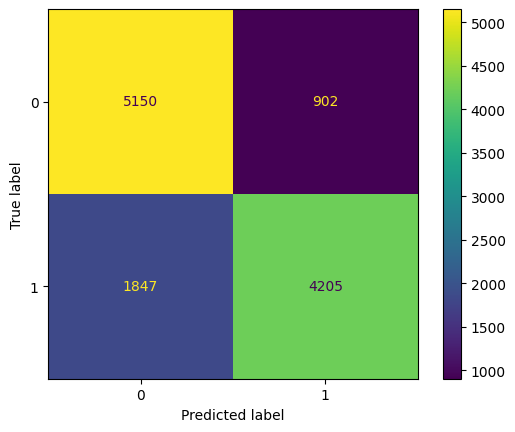

In [ ]:
cm_lrc1 = confusion_matrix(y_build_bal, predictions_lrc1, labels=None, sample_weight=None, normalize=None)
disp = ConfusionMatrixDisplay(cm_lrc1, display_labels=None)
disp.plot()
#plt.show()

We can thus calculate the accuracy at about 77%:

In [ ]:
cm = cm_lrc1

acc_lrc1 = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])

acc_lrc1

0.7728849966953073

The confusion matrix reveals that our ML algorithm seems to have done a fair job of addressing one of the most important challenges in higher ed. If we slice it

- vertically: we see that about 81% of students predicted to leave actually did
- horizontally: 69% of students that actually left the university were predicted to leave.

While this seems promising for an essentially fresh out the box model, we have to remember that the approximately 77% accurate predictions were made on the *training set*, i.e. the data used to build the model. In our running human learning analogy, all we've done is **memorize** a set of facts and definitions, and regurgitate them on a multiple choice exam that consisted of the precisely the same material we studied.  Unfortunately that is not indicative of whether we would be able to write an essay on the material we studied, or apply concepts learned to a scenario not discussed in class. To do that we'd need to examine our acuracy on an unseen test set.

#VIDEO 5

###Model Validation and Selection - Hyperparameter tuning and model generalizability

A model's performance on the training set is an initial indication of how well parameter choices do at minimizing the objective function. This is an important characteristic we build in to the modeling process. However, if our ultimate aim is deployment to new data, then it is mandatory that model choice be informed by applying the prediction and scoring steps of the *Fit-Predict-Score* cycle to unseen data.

As discussed in *Explaining Machine Learning Cycle With Hyperparameter Tuning* in Module 4, *k-Fold Cross Validation* is a powerful process we can apply to our data and model to simulate performance on unseen data. Figure 3 gives a visual representation on our example training data. To perform 6-fold cross validation, we randomly partition the training data into six mutually exclusive samples of size 2.

**Figure 3:** An example of 6-fold cross validation on a the training set of a dataframe with 15 observations.
![ih](files/ml-file-store/bronze/k_fold_pic.png)

These six mutually exclusive samples of size 2 refered to above will serve as test sets (referred to as *validation* sets in this context) for 6 independent batches of *Fit-Predict-Score* cycles. The corresponding training sets (referred to as *building* sets in this context) are the remaining 10 observations not selected for the validation set. Each batch is defined by a full run through the designated hyperparameter search space. To execute this process we first import the *cross_val_score* method from the *model_selection* module in scikit learn.

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

######Step 1: Identify Hyperparameter Search Space

The \\(C\\) hyperparameter controls the amount of regularization implemented. The default value in sklearn is \\(C=1.0\\). Based on this value, the l1_ratio, which we denote by \\(r\\) is selected. See below for a step-by-step approach on how to set the grid. Remember that this is both an art as well as a science, so there is no one right way to approach this.

In [ ]:
hp_grid = {'classifier__C': np.arange(0.2, 0.4, 0.01),
           'classifier__l1_ratio': np.arange(0,1,0.05)} # select a slice of the hyperparameter space informed by graphical observation. A dictionary is required for future operations, and we'll create a variable for the array by itself below

C_values = hp_grid['classifier__C']
r_values = hp_grid['classifier__l1_ratio']


######Step 2: Specify Number of Folds

To what extent should we divvy up our data up for validation? Consider two extremes:

\\(k=2\\)

Set one validation set that is half of the training set.
 - Pro: Computationally efficient. Validation is more challenging, so a better simulation of unseen data.
 - Con: Only one Fit-Predict-Score cycle, minimal training experience.

\\(k=n\\)

Each observation becomes its own validation set, and we use the remaining data to fit the model. Also known as leave-one-out cross validation.
 - Pro: Maximizes number of Fit-Predict-Score cycles, providing a profile of each point
 - Con: Computationally expensive

As we've become accustomed to, the ideal is in the balance. Typically we use \\(k\\) between \\(5\\) and \\(10\\).

In [ ]:
k = 5  # Selecting 5-fold cross-validation
cv_data = StratifiedKFold(n_splits=k,shuffle=True,random_state=rms) #creating the 5 fold resampled data

######Step 3: *Fit-Predict-Score*

Implement the *Fit-Predict-Score* cycle to identify average score across the 5 folds for each point in the hyperparameter space. This provides the criterion we will use to select our estimates for \\(C\\) and \\(r\\) and fit our final model. The following figure and subsequent code illustrate and execute this process.

**Figure 4:** An example of the Fit-Predict-Score cycle on one fold. This process is performed for each fold and averaged to produce one cross validation score per hyperparameter value.
<img src="files/ml-file-store/bronze/FPS_elastic_kFold.png" width="800" height="500">


The **GridSearchCV** function in scikit learn will provide a powerful tool for a smooth implementation of the Fit-Predict-Score cycle in the framework of k-fold cross validation.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
#Specify the model
model = pipeline_lrc1  #Our Elastic Net model with parameters selected to ensure convergence


#Fit-Predict-Score: : Implementing the FPS cycle from build set to validation set

classification_metric = 'accuracy'
#Could also choose recall to maximize ability to predict students leaving

# Create the grid search object
grid = GridSearchCV(estimator = model,
                    param_grid = hp_grid,
                    cv=cv_data,
                    scoring = classification_metric,
                    n_jobs=-1)

# Use cross-validation to fit the model and get mean R^2 score over all folds
grid.fit(Build_c,y_build_bal)

metric_values = grid.cv_results_['mean_test_score']


There are two hyperparameters (\\(C\\) and \\(r\\)) that characterize regularization in the elastic net, so our hyperparameter space is two dimensional. We can use a visualization known as a *heatmap* to search for optimal values for our classification metric. From that point, we'll look at the relationship between \\(C\\) and the classificatin metric for given values of the l1_ratio, \\(r\\).
In this context, an interactive graph will be immensely useful. So we again utilize the **plotly** library, this time working with the *graph_objects* module.

In [ ]:
import plotly.graph_objects as go

In [ ]:
#First reshape the long list of classification metric values into a rectangular array in which each row corresponds to a unique value of r
mvd = metric_values.reshape(len(r_values),len(C_values))

In [ ]:
#The heatmap is a visual representation of the rectangular array we created in the preceeding cell
fig = go.Figure(data=go.Heatmap(
                   z=mvd,
                   x=C_values,
                   y=r_values,
                   hoverongaps = False))
fig.show()

In [ ]:
fig = go.Figure(go.Surface(
    contours = {
        "x": {"show": True, "start": min(C_values), "end": max(C_values), "size": 0.8, "color":"white"},
        "y": {"show": True, "start": min(r_values), "end": max(r_values), "size": 0.8, "color":"white"},
        "z": {"show": True, "start": 0.6, "end": 1, "size": 0.5}
    },
    x = C_values,
    y = r_values,
    z = mvd
    ))
fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            "aspectratio": {"x": 1, "y": 1, "z": 0.2}
        })
fig.show()

For our initial implementation, we selected a broad swathe of values for the \\(C\\) and \\(r\\) hyperparameters. We will graph the relationship between \\(C\\) and our metric, and use the insight gained from it to identify a more selective subset for \\(C\\) to investigate more critically. As far as the values of \\(C\\) and \\(r\\) to select in the first place, one approach is the folowing:  

**Tips for investigating the hyperparameter space**

1. Consider the "out-of-the-box" fitted model. If it is in some sense "good" (e.g. performance exceeds baseline model) then explore hyperparameter values that are in close proximity to the scikit learn defaults. If the model is not "good", select a wider range of values away from the defaults.

2. Plot a heatmap visualizing the hyperparameter values on the x and y axes as suggested by step 1. Where applicable, let the x-axis represent the parameter most directly responsible for regularization. Your metric values should be plotted on the z-axis.

3. Identify a horizontal slice of the heatmap with the largest metric, and visualize the two dimensional relationship between the hyperparameter represented on the x-axis and the metric.

4. Keep in mind the hyperparameter space may be much wider than the search grid you have explored. Understanding the underlying model will inform to what extent you need to search the entire space once trends have been determined.

In [ ]:
#To make the horizontal slice, view the heatmap in light of the values we used for r. Set the value or r we select in the r_val variable at the top of the next cell
display(r_values)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [ ]:
r_val = 0.25

r_ind = np.where(r_values==r_val)[0][0]

#Plot and connect the dots with line segments
fig = go.Figure(data=go.Scatter(x=C_values, y=mvd[r_ind,]))

# Set plot title and axis labels
fig.update_layout(title='Average Cross-Validation Score vs. regularization strength C for Elastic Net Classification',
                  xaxis_title='C',
                  yaxis_title='Average CV Score',
                  xaxis=dict(tickangle=-45))

fig.show()

We can see that the graph reaches a peak somewhere between 0.30 and 0.35. Let's zoom our grid in and look for the optimal values.

In [ ]:
hp_grid_1 = {'classifier__C': np.arange(0.20, 0.30, 0.005),
             'classifier__l1_ratio': np.arange(0.1,0.6,0.05)
             } # A more selective slice of the hyperparameter space informed by graphical observation

metric = classification_metric

cv_folds = 5

# Create the grid search object
grid_1 = GridSearchCV(estimator = pipeline_lrc1,
                    param_grid = hp_grid_1,
                    cv=cv_folds,
                    scoring = metric,
                    n_jobs=-1)

# Use cross-validation to fit the model and get mean R^2 score over all folds
grid_1.fit(Build_c,y_build_bal)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['HS_ENGL_GPA',
                                                                          'HS_MATH_GPA',
                                                                          'GPA_1',
                                                                          'UNITS_ATTEMPTED_1',
                                                                          'DFW_RATE_1',
                                                                          'UNITS_ATTEMPTED_2',
                                                                          'GPA_2',
                                                                          'DFW_RATE_2']),
                                                                        ('cat',
                                                                         OneHotEncoder(categories=[array(['White', 'Hispanic/Latino', 'Asian', 'Visa Non-U.S.',
       'Two or More Races', 'Other', 'Black o...
                                        LogisticRegression(l1_ratio=0.5,
                                                           max_iter=1000,
                                                           penalty='elasticnet',
                                                           random_state=33,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'classifier__C': array([0.2  , 0.205, 0.21 , 0.215, 0.22 , 0.225, 0.23 , 0.235, 0.24 ,
       0.245, 0.25 , 0.255, 0.26 , 0.265, 0.27 , 0.275, 0.28 , 0.285,
       0.29 , 0.295]),
                         'classifier__l1_ratio': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55])},
             scoring='accuracy')

We can identify the optimal score, parameter and model as attributes of the *grid_1* object:

In [ ]:
# Get the results
print('Best metric: ',grid_1.best_score_)
print('Best alpha: ',grid_1.best_params_)
print('Best estimator: ',grid_1.best_estimator_)


Best metric:  0.7728011783942842
Best alpha:  {'classifier__C': 0.21500000000000002, 'classifier__l1_ratio': 0.5000000000000001}
Best estimator:  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['HS_ENGL_GPA', 'HS_MATH_GPA',
                                                   'GPA_1', 'UNITS_ATTEMPTED_1',
                                                   'DFW_RATE_1',
                                                   'UNITS_ATTEMPTED_2', 'GPA_2',
                                                   'DFW_RATE_2']),
                                                 ('cat',
                                                  OneHotEncoder(categories=[array(['White', 'Hispanic/Latino', 'Asian', 'Visa Non-U.S.',
       'Two or More Races', 'Other', 'Black or African American'],
      dtype=object),
                                                                            array(['Femal

Now that the optimal values for \\(C\\) and \\(r\\) have been chosen via cross validation, we fit the entire training set with the *best_lrc1* model, and use that to calculate performance on the test set.

In [ ]:
# Train and evaluate the model with the best hyperparameters on the entire training set
best_lrc1 = LogisticRegression(penalty='elasticnet', solver='saga',C=grid_1.best_params_['classifier__C'],l1_ratio=grid_1.best_params_['classifier__l1_ratio'],random_state=rms,max_iter=1000)


pipeline_lrc1_best = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', best_lrc1)
])

pipeline_lrc1_best.fit(Build_c, y_build_bal)
predictions_lrc1_best = pipeline_lrc1_best.predict(Build_c)
score_lrc1_best = pipeline_lrc1_best.score(Build_c,y_build_bal)
score_lrc1_best

0.7734633179114342

Note that this represents a slight improvement over the "out of the box" Lasso estimator:

In [ ]:
score_lrc1_best-score_lrc1

0.0005783212161268869

######Validation

We're ready to see how our built model performs on the validation set. We fit the model on the bulld set above, let's predict and score here:

In [ ]:
predictions_lrc1_best_val = pipeline_lrc1_best.predict(X_val_c1)
score_lrc1_best_val = pipeline_lrc1_best.score(X_val_c1,y_val_c)
print(score_lrc1_best_val)

0.8215384615384616


Not bad at all; the higher accuracy indicates our model generalizes very well. Now let's incorporate a search for the optimal threshold in our validation process:

Accuracy= 0.11794871794871795  Specificity= 0.011494252873563218  Precision= 0.10880829015544041  Sensitivity/Recall= 1.0


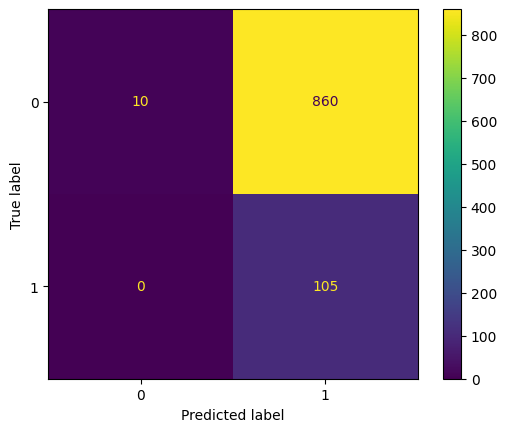

In [ ]:
# Get predicted probabilities
y_proba = pipeline_lrc1_best.predict_proba(X_val_c1)[:, 1]  # Probabilities for the positive class
threshold = 0.13        #This value is identified through trial and error - repeatedly using this code block to identify the best validation accuracy
yhat_th = (y_proba>=threshold).astype(int)

cm_lrc1_best = confusion_matrix(y_val_c, yhat_th, labels=None, sample_weight=None, normalize=None)
disp = ConfusionMatrixDisplay(cm_lrc1_best, display_labels=None)
disp.plot()
cm = cm_lrc1_best

acc_lrc1 = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])

specif_lrc1 = (cm[0,0])/(cm[0,0]+cm[0,1])

prec_lrc1 = (cm[1,1])/(cm[1,1]+cm[0,1])

sens_lrc1 = (cm[1,1])/(cm[1,1]+cm[1,0])

print("Accuracy=",acc_lrc1," Specificity=",specif_lrc1," Precision=",prec_lrc1," Sensitivity/Recall=",sens_lrc1)

######Variable Importance

Recall that regularized regression does not make the strong assumptions on the response variable that ordinary least squares does, and because of that, statistical inference concerning individual predictors is not available. That being said, elastic net is not a complete black box; we can identify and rank the variables that played the biggest role in identifying the optimal model. *Variable importance* is usually visualized graphically as follows:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


In [ ]:

X = X_train_p1


y = y_train_bal

model = LogisticRegression(penalty ='elasticnet',l1_ratio=0.1, solver='saga',C=0.445,random_state=rms,max_iter=1000)

# Calculate baseline accuracy
baseline_accuracy = cross_val_score(model, X, y, cv=5, scoring=classification_metric).mean()

# Calculate feature importance scores
importance_scores = []

for feature_index in range(X.shape[1]):
    X_subset = X.drop(X.columns[feature_index], axis=1)
    accuracy_after_removal = cross_val_score(model, X_subset, y, cv=5, scoring=classification_metric).mean()
    importance_scores.append(baseline_accuracy - accuracy_after_removal)

#Original Variables
importance_df = pd.DataFrame({'Feature': X_build_p1.columns, 'Change in Accuracy': importance_scores})

importance_df_sorted = importance_df.sort_values('Change in Accuracy')

# Plot the importance scores using Plotly Express
fig = px.bar(importance_df_sorted, y='Feature', x='Change in Accuracy',
             labels={'Change in Accuracy': 'Change in Accuracy'},
             orientation='h',  # Set orientation to horizontal
             title='Feature Importance for Elastic Net')

fig.show()


It is interesting to note that if we consider the \\(z\\) statistic as a measure of variable importance, our multiple logistic model 2 ranked the top 4 features in the same order.

#VIDEO 6

###Model Testing - Evaluating generalizability and looking ahead

A model is only useful to the extent that it can be deployed to make accurate predictions on unseen data from similar target populations. This is the reason for reserving a portion of our data as a test set, completely untouched by the building, validation or specification steps. We use accuracy as the primary metric to evaluate performance of our model, but due to the critical nature of identifying the positive class (students who leave campus), monitoring recall and sensitivity will be of utmost importance.  

######Fit Selected Model on Entire Training Set

In [ ]:
pipeline_lrc1_train = pipeline_lrc1_best.fit(X_train_c1,y_train_c)
pipeline_lrc1_train

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['HS_ENGL_GPA', 'HS_MATH_GPA',
                                                   'GPA_1', 'UNITS_ATTEMPTED_1',
                                                   'DFW_RATE_1',
                                                   'UNITS_ATTEMPTED_2', 'GPA_2',
                                                   'DFW_RATE_2']),
                                                 ('cat',
                                                  OneHotEncoder(categories=[array(['White', 'Hispanic/Latino', 'Asian', 'Visa Non-U.S.',
       'Two or More Races', 'Other', 'Black or African American'],
      dtype=object),
                                                                            array(['Female', 'Male'], dtype=object),
                                                                            array(['Continuing Generation', 'Unknown', 'First Generation'],
      dtype=object)]),
                                                  ['RACE_ETHNICITY', 'GENDER',
                                                   'FIRST_GEN_STATUS'])])),
                ('classifier',
                 LogisticRegression(C=0.21500000000000002,
                                    l1_ratio=0.5000000000000001, max_iter=1000,
                                    penalty='elasticnet', random_state=34,
                                    solver='saga'))])

Accuracy= 0.8460749102103643  Specificity= 0.8713956170703575  Precision= 0.38227146814404434  Sensitivity/Recall= 0.641860465116279


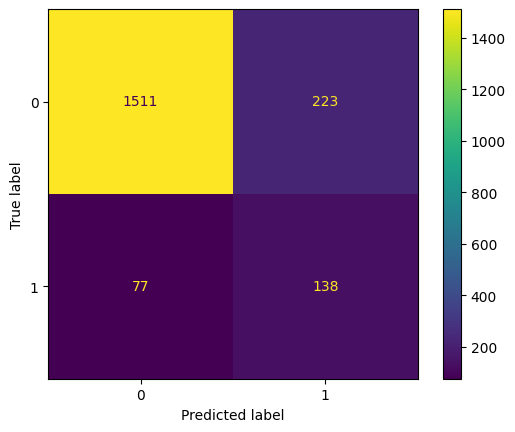

In [ ]:
probs = pipeline_lrc1_train.predict_proba(X_test_c1)[:, 1]  # Probabilities for the positive class
threshold = 0.13
yhat_th = (probs>=threshold).astype(int)

cm_lrc1 = confusion_matrix(y_test_c, yhat_th, labels=None, sample_weight=None, normalize=None)
disp = ConfusionMatrixDisplay(cm_lrc1, display_labels=None)
disp.plot()
cm = cm_lrc1

acc_lrc1 = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])

specif_lrc1 = (cm[0,0])/(cm[0,0]+cm[0,1])

prec_lrc1 = (cm[1,1])/(cm[1,1]+cm[0,1])

sens_lrc1 = (cm[1,1])/(cm[1,1]+cm[1,0])

print("Accuracy=",acc_lrc1," Specificity=",specif_lrc1," Precision=",prec_lrc1," Sensitivity/Recall=",sens_lrc1)

It is interesting to note the distribution of predicted probabilities of departure:``

In [ ]:
px.histogram(x=probs)

To evaluate performance of our final model and compare it with others, let's plot our final ROC and P-R curves:

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_c, probs)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test_c, probs)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(recall, precision):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

We conclude the testing phase by updating our running comparison of model performance

In [ ]:
Final_Metrics = pd.DataFrame({'Method':['Logistic','Elastic Net'],'Accuracy':[0.831195,acc_lrc1],'Precision':[0.358209,prec_lrc1],'Recall':[0.669767,sens_lrc1],'PR AUC':[0.548121,auc(recall, precision)]})
Final_Metrics

,Method,Accuracy,Precision,Recall,PR AUC
0,Logistic,0.831195,0.358209,0.669767,0.548121
1,Elastic Net,0.846075,0.382271,0.641860,0.564333


These metrics may be utilized in two primary ways

  1. As performance metrics we can compare with those from other models to make a final choice on which to deploy.

  We see here that the KNN model...
  
  2. By comparing test set metric values with those from the training set, close values indicate the ability of our model to generalize.

  Test metrics are only slightly worse than training metrics, indicating both models are useful for generalizing to unseen data.

#VIDEO 7

##Deploying the Data for Impact

###Predicting Outcomes for new Cases

With the trained, tested and validated model in hand, Shontelle is ready to utilize it to glean insights concerning a random sample of students who have shown various signs of struggling in their university experience. She then downloads a spreadsheet entitled **predict.csv**. Let's take a look at the data:

In [ ]:
predict_copy = predict.copy()

predict_copy

,SID,COHORT,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS,HS_MATH_GPA,HS_ENGL_GPA,COLLEGE,UNITS_ATTEMPTED_1,UNITS_ATTEMPTED_2,UNITS_COMPLETED_1,UNITS_COMPLETED_2,GPA_1,GPA_2,SEM_1_STATUS
0,JHPSY555D,Fall 2023,Hispanic/Latino,Female,Unknown,3.97,4.09,Business,12.0,NaN,6.0,NaN,1.666667,NaN,NR
1,9KC4NM2YV,Fall 2023,Hispanic/Latino,Male,First Generation,3.67,3.77,Arts,15.0,12.0,6.0,0.0,2.000000,0.000000,C
2,33M8O2J01,Fall 2023,Hispanic/Latino,Male,First Generation,2.78,3.19,University Programs,13.0,NaN,10.0,NaN,2.000000,NaN,NR
3,AMX4WP4A0,Fall 2023,Hispanic/Latino,Female,Continuing Generation,4.02,4.15,Science,13.0,15.0,13.0,11.0,2.615385,2.266667,C
4,R32ET2VTA,Fall 2023,Hispanic/Latino,Male,Continuing Generation,3.08,3.58,University Programs,6.0,6.0,3.0,3.0,1.000000,1.500000,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14359,BXXXVTVLJ,Fall 2023,White,Male,First Generation,3.98,3.84,Health,14.0,NaN,0.0,NaN,NaN,NaN,NR
14360,WPFBYCAF2,Fall 2023,Hispanic/Latino,Female,First Generation,3.79,3.61,Liberal Arts,15.0,NaN,0.0,NaN,0.000000,NaN,NR
14361,9DB0QFR11,Fall 2023,Hispanic/Latino,Female,First Generation,3.54,3.89,Engineering,14.0,NaN,14.0,NaN,2.923077,NaN,NR
14362,F7Z5NC62T,Fall 2023,Asian,Male,Continuing Generation,3.11,3.37,Engineering,12.0,NaN,5.0,NaN,1.416667,NaN,NR


In [ ]:
predict_copy['DFW_RATE_1'] = (predict_copy['UNITS_ATTEMPTED_1']-predict_copy['UNITS_COMPLETED_1'])/predict_copy['UNITS_ATTEMPTED_1']

#DFW Rate Term 2
predict_copy['DFW_RATE_2'] = (predict_copy['UNITS_ATTEMPTED_2']-predict_copy['UNITS_COMPLETED_2'])/predict_copy['UNITS_ATTEMPTED_2']


In [ ]:
predict_copy1 = predict_copy.dropna()

In [ ]:
np.random.seed(rms); pred_sam_ind = np.random.choice(predict_copy1[(predict_copy1['GPA_1']<=3.0) & predict_copy1['GPA_2']<=3.0]['SID'], size=10, replace=False)
pred_sam_ind

array(['7JQLAYZLI', 'LXWJ36QZM', '27WYDZMY5', '361CTKCC7', 'OMX2V4SW6',
       'NG9LGMEOP', 'K31H5XQA3', '65G2D1P8S', 'GSPDGDVZ8', 'E4YX926EY'],
      dtype=object)

In [ ]:
esam = predict_copy1[predict_copy1['SID'].isin(pred_sam_ind)].sort_values('GENDER')
esam

,SID,COHORT,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS,HS_MATH_GPA,HS_ENGL_GPA,COLLEGE,UNITS_ATTEMPTED_1,UNITS_ATTEMPTED_2,UNITS_COMPLETED_1,UNITS_COMPLETED_2,GPA_1,GPA_2,SEM_1_STATUS,DFW_RATE_1,DFW_RATE_2
210,OMX2V4SW6,Fall 2023,Hispanic/Latino,Female,First Generation,4.21,4.32,Engineering,14.0,13.0,14.0,13.0,4.000000,4.000000,C,0.000000,0.0000
924,GSPDGDVZ8,Fall 2023,Hispanic/Latino,Female,Unknown,3.93,4.29,Engineering,14.0,12.0,14.0,12.0,3.714286,4.000000,C,0.000000,0.0000
1129,K31H5XQA3,Fall 2023,Hispanic/Latino,Female,Continuing Generation,3.36,3.85,University Programs,15.0,16.0,9.0,13.0,2.750000,2.692308,C,0.400000,0.1875
2267,27WYDZMY5,Fall 2023,Asian,Female,Continuing Generation,3.51,3.60,Engineering,14.0,15.0,14.0,15.0,3.571429,3.533333,C,0.000000,0.0000
4109,LXWJ36QZM,Fall 2023,White,Female,Continuing Generation,3.96,4.15,Arts,17.0,15.0,17.0,15.0,4.000000,4.000000,C,0.000000,0.0000
7888,NG9LGMEOP,Fall 2023,Black or African American,Female,Unknown,3.39,4.00,Health,14.0,12.0,11.0,12.0,2.571429,3.250000,C,0.214286,0.0000
8093,361CTKCC7,Fall 2023,Hispanic/Latino,Female,First Generation,3.59,4.22,Health,12.0,15.0,12.0,15.0,3.500000,3.600000,C,0.000000,0.0000
9492,65G2D1P8S,Fall 2023,Hispanic/Latino,Female,First Generation,4.32,4.44,Education,14.0,12.0,14.0,12.0,3.785714,4.000000,C,0.000000,0.0000
479,E4YX926EY,Fall 2023,Hispanic/Latino,Male,First Generation,2.51,3.22,University Programs,13.0,12.0,10.0,12.0,1.333333,3.000000,C,0.230769,0.0000
2145,7JQLAYZLI,Fall 2023,Hispanic/Latino,Male,Continuing Generation,2.92,3.07,Business,13.0,12.0,10.0,6.0,2.500000,1.000000,C,0.230769,0.5000


Let's ask AI to generate 10 random names matching the data

In [ ]:
esam['NAME'] = ["Sophia", "Emma", "Olivia", "Ava", "Isabella", "Maya", "Liz", "Noelle", "Elijah", "James"]

In [ ]:
esam

,SID,COHORT,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS,HS_MATH_GPA,HS_ENGL_GPA,COLLEGE,UNITS_ATTEMPTED_1,UNITS_ATTEMPTED_2,UNITS_COMPLETED_1,UNITS_COMPLETED_2,GPA_1,GPA_2,SEM_1_STATUS,DFW_RATE_1,DFW_RATE_2,NAME
210,OMX2V4SW6,Fall 2023,Hispanic/Latino,Female,First Generation,4.21,4.32,Engineering,14.0,13.0,14.0,13.0,4.000000,4.000000,C,0.000000,0.0000,Sophia
924,GSPDGDVZ8,Fall 2023,Hispanic/Latino,Female,Unknown,3.93,4.29,Engineering,14.0,12.0,14.0,12.0,3.714286,4.000000,C,0.000000,0.0000,Emma
1129,K31H5XQA3,Fall 2023,Hispanic/Latino,Female,Continuing Generation,3.36,3.85,University Programs,15.0,16.0,9.0,13.0,2.750000,2.692308,C,0.400000,0.1875,Olivia
2267,27WYDZMY5,Fall 2023,Asian,Female,Continuing Generation,3.51,3.60,Engineering,14.0,15.0,14.0,15.0,3.571429,3.533333,C,0.000000,0.0000,Ava
4109,LXWJ36QZM,Fall 2023,White,Female,Continuing Generation,3.96,4.15,Arts,17.0,15.0,17.0,15.0,4.000000,4.000000,C,0.000000,0.0000,Isabella
7888,NG9LGMEOP,Fall 2023,Black or African American,Female,Unknown,3.39,4.00,Health,14.0,12.0,11.0,12.0,2.571429,3.250000,C,0.214286,0.0000,Maya
8093,361CTKCC7,Fall 2023,Hispanic/Latino,Female,First Generation,3.59,4.22,Health,12.0,15.0,12.0,15.0,3.500000,3.600000,C,0.000000,0.0000,Liz
9492,65G2D1P8S,Fall 2023,Hispanic/Latino,Female,First Generation,4.32,4.44,Education,14.0,12.0,14.0,12.0,3.785714,4.000000,C,0.000000,0.0000,Noelle
479,E4YX926EY,Fall 2023,Hispanic/Latino,Male,First Generation,2.51,3.22,University Programs,13.0,12.0,10.0,12.0,1.333333,3.000000,C,0.230769,0.0000,Elijah
2145,7JQLAYZLI,Fall 2023,Hispanic/Latino,Male,Continuing Generation,2.92,3.07,Business,13.0,12.0,10.0,6.0,2.500000,1.000000,C,0.230769,0.5000,James


Shontelle is happy with the sample, as a quick glance indicates ethnic and academic diversity, a reflection of her university. She notices that the data indicates that Marisol, Alex and Ana are currently in academc warning due to their CUM_GPA_2 being less than 2.0:

In [ ]:
esam['NAME'][(esam['GPA_1']<2.0) | (esam['GPA_2']<2.0)]

479     Elijah
2145     James
Name: NAME, dtype: object

As academic disqualification is not completely determined until the end of term 3, she aims to use our validated model to predict status at the beginning of semester 3.

Based on our approach above she realizes she has some feature engineering to do, and so she then calculates DFW rates and grade points for each term:

To prepare her dataframe for the pipelines used in this notebook, she removes variables not included in the modeling process, and verifies that they match our work above:

In [ ]:
esam2 = esam[selected_columns]
esam2

,HS_ENGL_GPA,HS_MATH_GPA,GPA_1,UNITS_ATTEMPTED_1,DFW_RATE_1,UNITS_ATTEMPTED_2,GPA_2,DFW_RATE_2,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS
210,4.32,4.21,4.000000,14.0,0.000000,13.0,4.000000,0.0000,Hispanic/Latino,Female,First Generation
924,4.29,3.93,3.714286,14.0,0.000000,12.0,4.000000,0.0000,Hispanic/Latino,Female,Unknown
1129,3.85,3.36,2.750000,15.0,0.400000,16.0,2.692308,0.1875,Hispanic/Latino,Female,Continuing Generation
2267,3.60,3.51,3.571429,14.0,0.000000,15.0,3.533333,0.0000,Asian,Female,Continuing Generation
4109,4.15,3.96,4.000000,17.0,0.000000,15.0,4.000000,0.0000,White,Female,Continuing Generation
7888,4.00,3.39,2.571429,14.0,0.214286,12.0,3.250000,0.0000,Black or African American,Female,Unknown
8093,4.22,3.59,3.500000,12.0,0.000000,15.0,3.600000,0.0000,Hispanic/Latino,Female,First Generation
9492,4.44,4.32,3.785714,14.0,0.000000,12.0,4.000000,0.0000,Hispanic/Latino,Female,First Generation
479,3.22,2.51,1.333333,13.0,0.230769,12.0,3.000000,0.0000,Hispanic/Latino,Male,First Generation
2145,3.07,2.92,2.500000,13.0,0.230769,12.0,1.000000,0.5000,Hispanic/Latino,Male,Continuing Generation


Next she runs her risk data through the feature engineering pipeline for qualitative and quantitative variables. Finally she uses our final, "best" model validated and selected above to predict probability of departure for each student, and uses a 0.72 threshold to classify 0's and 1's.

In [ ]:
#Initialize the new dataframe
esam1 = esam.copy()

#
#esam3 = pd.DataFrame(preprocessor.fit_transform(esam2),columns=all_column_names)
#esam4 = esam3[selected_features]

# Get predicted probabilities
esam1['Pred_SEM_3_STATUS_prob'] = pipeline_lrc1_train.predict_proba(esam1)[:, 1]  # Probabilities for the positive class

threshold = 0.13
esam1['Pred_SEM_3_STATUS'] = (esam1['Pred_SEM_3_STATUS_prob']>=threshold).astype(int)
esam1.sort_values(by='Pred_SEM_3_STATUS_prob')

,SID,COHORT,RACE_ETHNICITY,GENDER,FIRST_GEN_STATUS,HS_MATH_GPA,HS_ENGL_GPA,COLLEGE,UNITS_ATTEMPTED_1,UNITS_ATTEMPTED_2,UNITS_COMPLETED_1,UNITS_COMPLETED_2,GPA_1,GPA_2,SEM_1_STATUS,DFW_RATE_1,DFW_RATE_2,NAME,Pred_SEM_3_STATUS_prob,Pred_SEM_3_STATUS
210,OMX2V4SW6,Fall 2023,Hispanic/Latino,Female,First Generation,4.21,4.32,Engineering,14.0,13.0,14.0,13.0,4.000000,4.000000,C,0.000000,0.0000,Sophia,0.021535,0
9492,65G2D1P8S,Fall 2023,Hispanic/Latino,Female,First Generation,4.32,4.44,Education,14.0,12.0,14.0,12.0,3.785714,4.000000,C,0.000000,0.0000,Noelle,0.023018,0
924,GSPDGDVZ8,Fall 2023,Hispanic/Latino,Female,Unknown,3.93,4.29,Engineering,14.0,12.0,14.0,12.0,3.714286,4.000000,C,0.000000,0.0000,Emma,0.024273,0
8093,361CTKCC7,Fall 2023,Hispanic/Latino,Female,First Generation,3.59,4.22,Health,12.0,15.0,12.0,15.0,3.500000,3.600000,C,0.000000,0.0000,Liz,0.026358,0
4109,LXWJ36QZM,Fall 2023,White,Female,Continuing Generation,3.96,4.15,Arts,17.0,15.0,17.0,15.0,4.000000,4.000000,C,0.000000,0.0000,Isabella,0.026854,0
2267,27WYDZMY5,Fall 2023,Asian,Female,Continuing Generation,3.51,3.60,Engineering,14.0,15.0,14.0,15.0,3.571429,3.533333,C,0.000000,0.0000,Ava,0.027613,0
7888,NG9LGMEOP,Fall 2023,Black or African American,Female,Unknown,3.39,4.00,Health,14.0,12.0,11.0,12.0,2.571429,3.250000,C,0.214286,0.0000,Maya,0.070542,0
479,E4YX926EY,Fall 2023,Hispanic/Latino,Male,First Generation,2.51,3.22,University Programs,13.0,12.0,10.0,12.0,1.333333,3.000000,C,0.230769,0.0000,Elijah,0.075567,0
1129,K31H5XQA3,Fall 2023,Hispanic/Latino,Female,Continuing Generation,3.36,3.85,University Programs,15.0,16.0,9.0,13.0,2.750000,2.692308,C,0.400000,0.1875,Olivia,0.126443,0
2145,7JQLAYZLI,Fall 2023,Hispanic/Latino,Male,Continuing Generation,2.92,3.07,Business,13.0,12.0,10.0,6.0,2.500000,1.000000,C,0.230769,0.5000,James,0.202741,1


Note here that we are using the model fit using the training set. This means the test data is left on the table for prediction. In theory, in the same way we combined the build and validate sets when validation was completed and it was time for testing, we can at this point combine the training and test sets now that it is time for prediction. This will be left as an exercise for you to perform, and compare model predictions with those generated by the present final model.

###Addressing the Higher Ed Challenge

The model predicts Olivia and James to be in danger of leaving the university before the start of the next semester. Given that our test precision is about 34%, Shontelle understands that not all students predicted to be 1 will actually depart; and not all students predicted to stay will. So she utilizes the predictions as a starting point, synthesizes it with her findings from the focus group and literature, and identifies further that James and Olivia as at particular risk for dropping out. She arranges time to meet with them to ensure that they have the academic and socio-emotional support they need.

Note that this model was "smarter" than the logistic model when it comes to Elijah. It did not classify him as at-risk for dropout in term 3. He made significant improvement from term 1 to term 2, and s encouraged to continue this positive trajectory.

Finally, we see that the model predicts a 8/10 = 80% *retention rate* for this group of students. Thus predictions made for individual students have implications for selected subgroups and cohorts. This gives Shontelle the information she needs to recommend broad action and report wide reaching predictive aggregate metrics to stakehlders.